In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, colors

import pandas
print(pandas.__version__)

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 10,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 245    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [2*fig_width, 2*fig_height]
rcParams.update({'figure.figsize': fig_size})

1.1.5


In [2]:
def extract_forecasts(data, forecast_period):
    
    dates = []
    dates_pivot = []
    data_quantile_0025_cont = []
    data_quantile_0975_cont = []
    data_point_cont = []
    
    for file in sorted(os.listdir(ensemble_forecast_directory))[7:]:    

        if file[-4:] == '.csv':
            
            print(f"importing{ensemble_forecast_directory+file}")
            data = pd.read_csv(ensemble_forecast_directory+file)
            
            data = data[data['location'] == 'US']
                
            data_quantile = data[data['type'] == 'quantile']
                        
            data_quantile_0025 = data[data['quantile'] == 0.025]    
            data_quantile_0975 = data[data['quantile'] == 0.975]     
            
            data_point = data[data['type'] == 'point']
            
            dates_pivot.append(data_point[data_point['target'] == forecast_period]['forecast_date'].to_numpy()[0])
            
            dates.append(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['target_end_date'].to_numpy()[0])
            data_quantile_0025_cont.append(float(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['value']))
            data_quantile_0975_cont.append(float(data_quantile_0975[data_quantile_0975['target'] == forecast_period]['value']))
            data_point_cont.append(float(data_point[data_point['target'] == forecast_period]['value']))
    
    dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
    dates_pivot = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_pivot]
    
    return np.asarray(dates), np.asarray(dates_pivot), np.asarray(data_quantile_0025_cont), np.asarray(data_quantile_0975_cont), np.asarray(data_point_cont)

In [132]:
#fetched_month_year_str = "fetched_Jan_2022"
fetched_month_year_str = "fetched_Dec_2021"

In [133]:
covid_data = pd.read_csv(f'../../data/Covid19_ground_truth_reports/{fetched_month_year_str}/time_series_covid19_deaths_US.csv')

print(covid_data.head())
colnames = covid_data.columns.tolist()

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 12/19/21  12/20/21  12/21/21  12/22/21  12/23/21  \
0  32.539527 -86.644082  ...      159       159       160       160       160   
1  30.727750 -87.722071  ...      592       592       592       593       593   
2  31.868263 -85.387129  ...       81        81        81        81        81   
3  32.996421 -87.125115  ...       95        95        95        95        95   
4  33.982109 -86.567906  ...      195       195       197       197       197   

   12/24/21  12/25/21  12/26/21  12/27

2020-01-22 00:00:00 2021-12-28 00:00:00


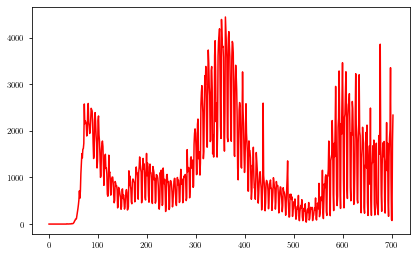

In [134]:
start = datetime.datetime.strptime(colnames[12], "%m/%d/%y")
end = datetime.datetime.strptime(colnames[-1], "%m/%d/%y")

print(start, end)

dates_covid_data = np.asarray([start + datetime.timedelta(days=x) for x in range(0, (end-start).days)])
dates_covid_data = dates_covid_data[3:][::7]

deaths_covid_data = [covid_data.iloc[:,i].sum() for i in range(12,len(colnames))]
deaths_covid_data_dates = [colnames[i] for i in range(12,len(colnames))]

original_cum_signal = deaths_covid_data[3:]
deaths_covid_data = np.diff(deaths_covid_data[3:])
plt.plot(deaths_covid_data,'r')

original_signal = deaths_covid_data
original_signal_dates = deaths_covid_data_dates[4:]

In [135]:
ensemble_forecast_directory = f'../../data/CDC_ensemble_forecasts/{fetched_month_year_str}/COVIDhub-ensemble/'

dates_1wk, dates_forecast_1wk, data_quantile_0025_1wk, data_quantile_0975_1wk, data_point_1wk = \
extract_forecasts(ensemble_forecast_directory, '1 wk ahead inc death')

dates_2wk, dates_forecast_2wk, data_quantile_0025_2wk, data_quantile_0975_2wk, data_point_2wk = \
extract_forecasts(ensemble_forecast_directory, '2 wk ahead inc death')

dates_3wk, dates_forecast_3wk, data_quantile_0025_3wk, data_quantile_0975_3wk, data_point_3wk = \
extract_forecasts(ensemble_forecast_directory, '3 wk ahead inc death')

dates_4wk, dates_forecast_4wk, data_quantile_0025_4wk, data_quantile_0975_4wk, data_point_4wk = \
extract_forecasts(ensemble_forecast_directory, '4 wk ahead inc death')

importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-03-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-10-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-17-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-24-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-31-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-07-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-14-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-21-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ens

importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-07-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-14-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-21-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-28-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-05-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-12-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-19-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-26-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ens

importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-24-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-08-31-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-07-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-14-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-21-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-28-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-05-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-12-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ens

importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-09-28-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-05-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-12-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-19-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-10-26-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-11-02-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-11-09-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ensemble/2020-11-16-epiforecasts-ensemble1.csv
importing../../data/CDC_ensemble_forecasts/fetched_Dec_2021/COVIDhub-ens

In [136]:
for i in range(0,len(dates_4wk)):
    print(f"target:{dates_4wk[i]}|forecast:{dates_forecast_4wk[i]}|value:{data_point_4wk[i]}|data_quantile_0025_4wk:{data_quantile_0025_4wk[i]}")

target:2020-08-29 00:00:00|forecast:2020-08-03 00:00:00|value:9334.0|data_quantile_0025_4wk:4703.0
target:2020-09-05 00:00:00|forecast:2020-08-10 00:00:00|value:8575.0|data_quantile_0025_4wk:2249.0
target:2020-09-12 00:00:00|forecast:2020-08-17 00:00:00|value:7707.0|data_quantile_0025_4wk:4889.0
target:2020-09-19 00:00:00|forecast:2020-08-24 00:00:00|value:5985.0|data_quantile_0025_4wk:2761.0
target:2020-09-26 00:00:00|forecast:2020-08-31 00:00:00|value:4872.0|data_quantile_0025_4wk:804.0
target:2020-10-03 00:00:00|forecast:2020-09-07 00:00:00|value:4604.0|data_quantile_0025_4wk:818.0
target:2020-10-10 00:00:00|forecast:2020-09-14 00:00:00|value:3273.0|data_quantile_0025_4wk:1237.0
target:2020-10-17 00:00:00|forecast:2020-09-21 00:00:00|value:3385.0|data_quantile_0025_4wk:1644.0
target:2020-10-24 00:00:00|forecast:2020-09-28 00:00:00|value:4374.0|data_quantile_0025_4wk:2673.0
target:2020-10-31 00:00:00|forecast:2020-10-05 00:00:00|value:4309.0|data_quantile_0025_4wk:2888.0
target:2020-

In [137]:
def euler_lagrange(signal_cum_df__, weeks__ = 1, diff_length__ = 7, corr__ = True, debug__ = 0):
    assert signal_cum_df__[-1]>signal_cum_df__[-2] # monotone increasing check
    
    if (debug__ ): print("euler-lagrange method input:", signal_cum_df__.tail())
    
    # get discrete derivative [diff_length__] of signal_cum_df_ -- cumulative numbers -- less noisy)
    derivative_week_discrete = signal_cum_df__[-1] - signal_cum_df__[-diff_length__]  
    if (debug__ ): print(f"euler-lagrange derivative{signal_cum_df__[-1]}-{signal_cum_df__[-diff_length__]}=", derivative_week_discrete)
    
    if corr__:
        # total variation optimization to denoise 2nd derivative 
        xinv = extract_min_total_variation_optimization(signal_cum_df__.to_numpy())

        # 2nd derivative after total variation optimization 
        derivative__2nd_weekly = (xinv[-1] - xinv[-diff_length__])*corr__
        if (debug__ ): print("euler-lagrange 2nd derivative:", derivative__2nd_weekly)

        derivative_corr =  weeks__*derivative__2nd_weekly
        if (debug__ ): print("number of weeks to future and correction", weeks__, derivative_corr)
        euler_lagrange_pred = derivative_week_discrete + derivative_corr
    else:
        euler_lagrange_pred = derivative_week_discrete
    
    return euler_lagrange_pred

import pylops
def extract_min_total_variation_optimization(original_signal__):
    y = np.diff(original_signal__)
    nx = len(y)
    Iop = pylops.Identity(nx)
    
    # Model: y = Iop*(x + n), n - noise, 
    # xinv = argmin ||y-Ix||_2 + lambda*||\grad[x]||_2
    
    D2op = pylops.SecondDerivative(nx, edge=True)
    lamda = 1e5
    xinv = pylops.optimization.leastsquares.RegularizedInversion(Iop, [D2op], y,
                                                          epsRs=[np.sqrt(lamda/2)],
                                                          **dict(iter_lim=30))
    
    return xinv

In [138]:
def error_comparison_all_raw(covid_data_raw__, cdc_ensemble_forecast__, cdc_dates__, weeks__, corr__ = True, debug__ = 0):
    # total variation on derivative + reconstruction minimization ~ Euler-Lagrange 
    div = 1
    error_euler = []
    error_ensemble = []
    error_date = []
    euler_pred_list = []
    cdc_pred_list = []
    pivot_date = []
    ground_truth_list = []
    for i in range(len(cdc_dates__)):
        date_tmp = cdc_dates__[i]
        if (debug__ ): print("<<<prediction date", date_tmp.strftime("%-m/%-d/%y"))
        ind = np.where(covid_data_raw__.columns == date_tmp.strftime("%-m/%-d/%y"))
        if len(ind[0]):
            error_date.append(date_tmp)
            ind = ind[0][0]
            
            if (debug__ ): print("ind element on covid data",ind,  covid_data.iloc[:,ind].sum())
            
            current_week_slice = covid_data.iloc[:,ind-7+1:ind+1].sum()
            if (debug__ ): print("current week (prediction week)", current_week_slice)
            
            current_week_death_diff = current_week_slice[-1]-current_week_slice[0]
            if (debug__ ) :print("current week dead diff", current_week_death_diff)
 
            all_history_slice = covid_data.iloc[:,12:ind-7*weeks__+1+1].sum()
            if (debug__ ): print("historical slice",all_history_slice.tail(14))
            if (debug__ ): print("last date history", all_history_slice.index[-1])
            pivot_date.append( datetime.datetime.strptime(all_history_slice.index[-1], "%m/%d/%y") )
        
            euler_pred = euler_lagrange(all_history_slice, weeks__, corr__=corr__, debug__=debug__)
            euler_pred_list.append(euler_pred)
            if (debug__ ): print("euler pred with dedicated function", euler_pred)
            
            error_euler.append(abs(euler_pred-current_week_death_diff))
            error_ensemble.append(abs(cdc_ensemble_forecast__[i]-current_week_death_diff))
            cdc_pred_list.append(cdc_ensemble_forecast__[i])
            ground_truth_list.append(current_week_death_diff)
            
            if (debug__ ): print(f"cdc estimate {cdc_ensemble_forecast__[i]} for {cdc_dates__[i]} or {date_tmp} >>>")
      
    error_euler = np.transpose(np.asarray(error_euler)/div)
    error_ensemble =  np.transpose(np.asarray(error_ensemble)/div )
    error_euler_cum =  np.transpose(np.cumsum(error_euler))
    error_ensemble_cum =  np.transpose(np.cumsum(error_ensemble))
    error_date =  np.transpose(np.asarray(error_date))
    euler_pred_list = np.transpose(np.asarray(euler_pred_list))
    cdc_pred_list = np.transpose(np.asarray(cdc_pred_list))
    ground_truth = np.transpose(np.asarray(ground_truth_list))
    
    print(error_euler.shape)
    
    data = [error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date,pivot_date,\
            euler_pred_list, cdc_pred_list, ground_truth]
    df = pd.DataFrame(data).T
    
    df.columns = ["error_euler","error_cdc_ensemble","cum_error_euler",\
                                       "cum_error_cdc_ensemble","target_prediction_date", "prediction_made_date",\
                 "euler_prediction_value", "cdc_prediction_value", "ground_truth_incidence"]
    
    return df
    #return error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date

results/fetched_Dec_2021/US
(72,)
(72,)
results going to ../../results/fetched_Dec_2021/US
 csv path
../../results/fetched_Dec_2021/US/fetched_Dec_2021_error_euler_langrange_cdc_week_1.csv
fig goes to 
../../results/fetched_Dec_2021/US/fetched_Dec_2021_prediction_error_euler_langrange_week_1.pdf


/Users/anino/anaconda3/envs/network_env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/anino/anaconda3/envs/network_env/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/anino/anaconda3/envs/network_env/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


week forecst 1
cum cdc error:  100173.45333333332
cum euler lagrange error:  89392.15693920637
cum euler error:  88271.0
(71,)
(71,)
results going to ../../results/fetched_Dec_2021/US
 csv path
../../results/fetched_Dec_2021/US/fetched_Dec_2021_error_euler_langrange_cdc_week_2.csv
fig goes to 
../../results/fetched_Dec_2021/US/fetched_Dec_2021_prediction_error_euler_langrange_week_2.pdf
week forecst 2
cum cdc error:  111920.59916666667
cum euler lagrange error:  129733.22303290591
cum euler error:  131207.0
(70,)
(70,)
results going to ../../results/fetched_Dec_2021/US
 csv path
../../results/fetched_Dec_2021/US/fetched_Dec_2021_error_euler_langrange_cdc_week_3.csv
fig goes to 
../../results/fetched_Dec_2021/US/fetched_Dec_2021_prediction_error_euler_langrange_week_3.pdf
week forecst 3
cum cdc error:  141699.4448333333
cum euler lagrange error:  162873.7912828919
cum euler error:  167694.0
(69,)
(69,)
results going to ../../results/fetched_Dec_2021/US
 csv path
../../results/fetched_De

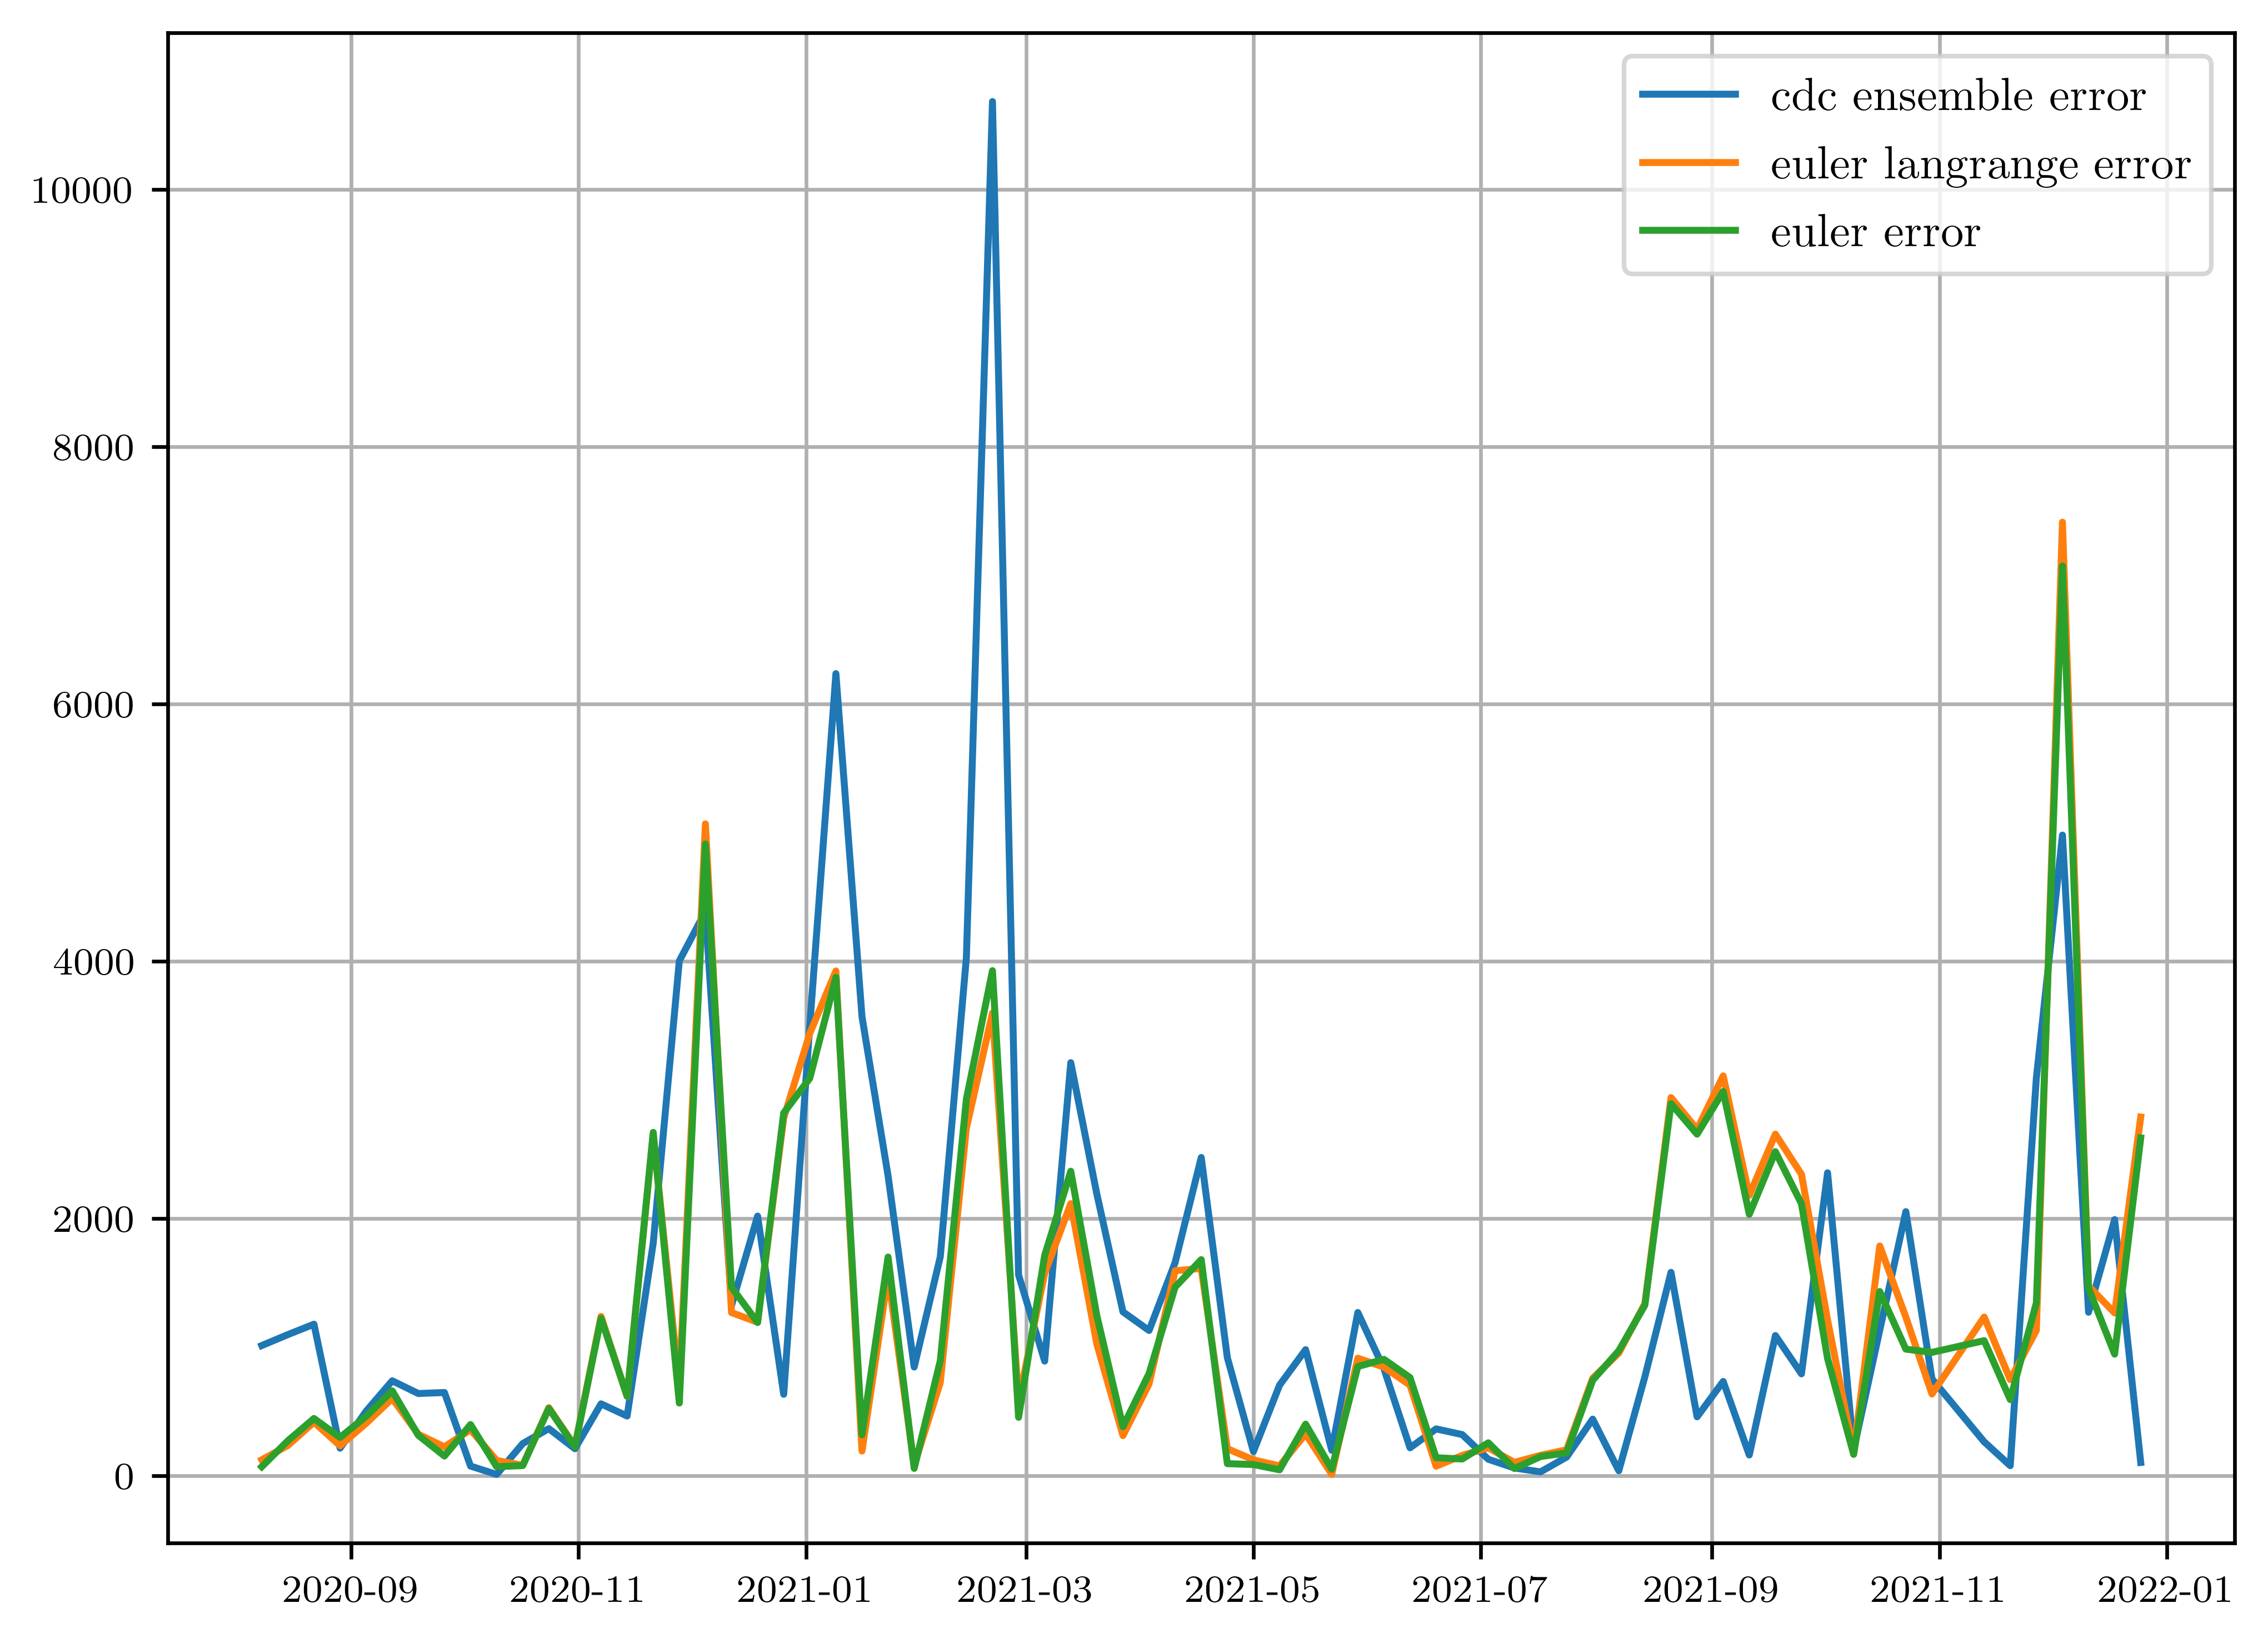

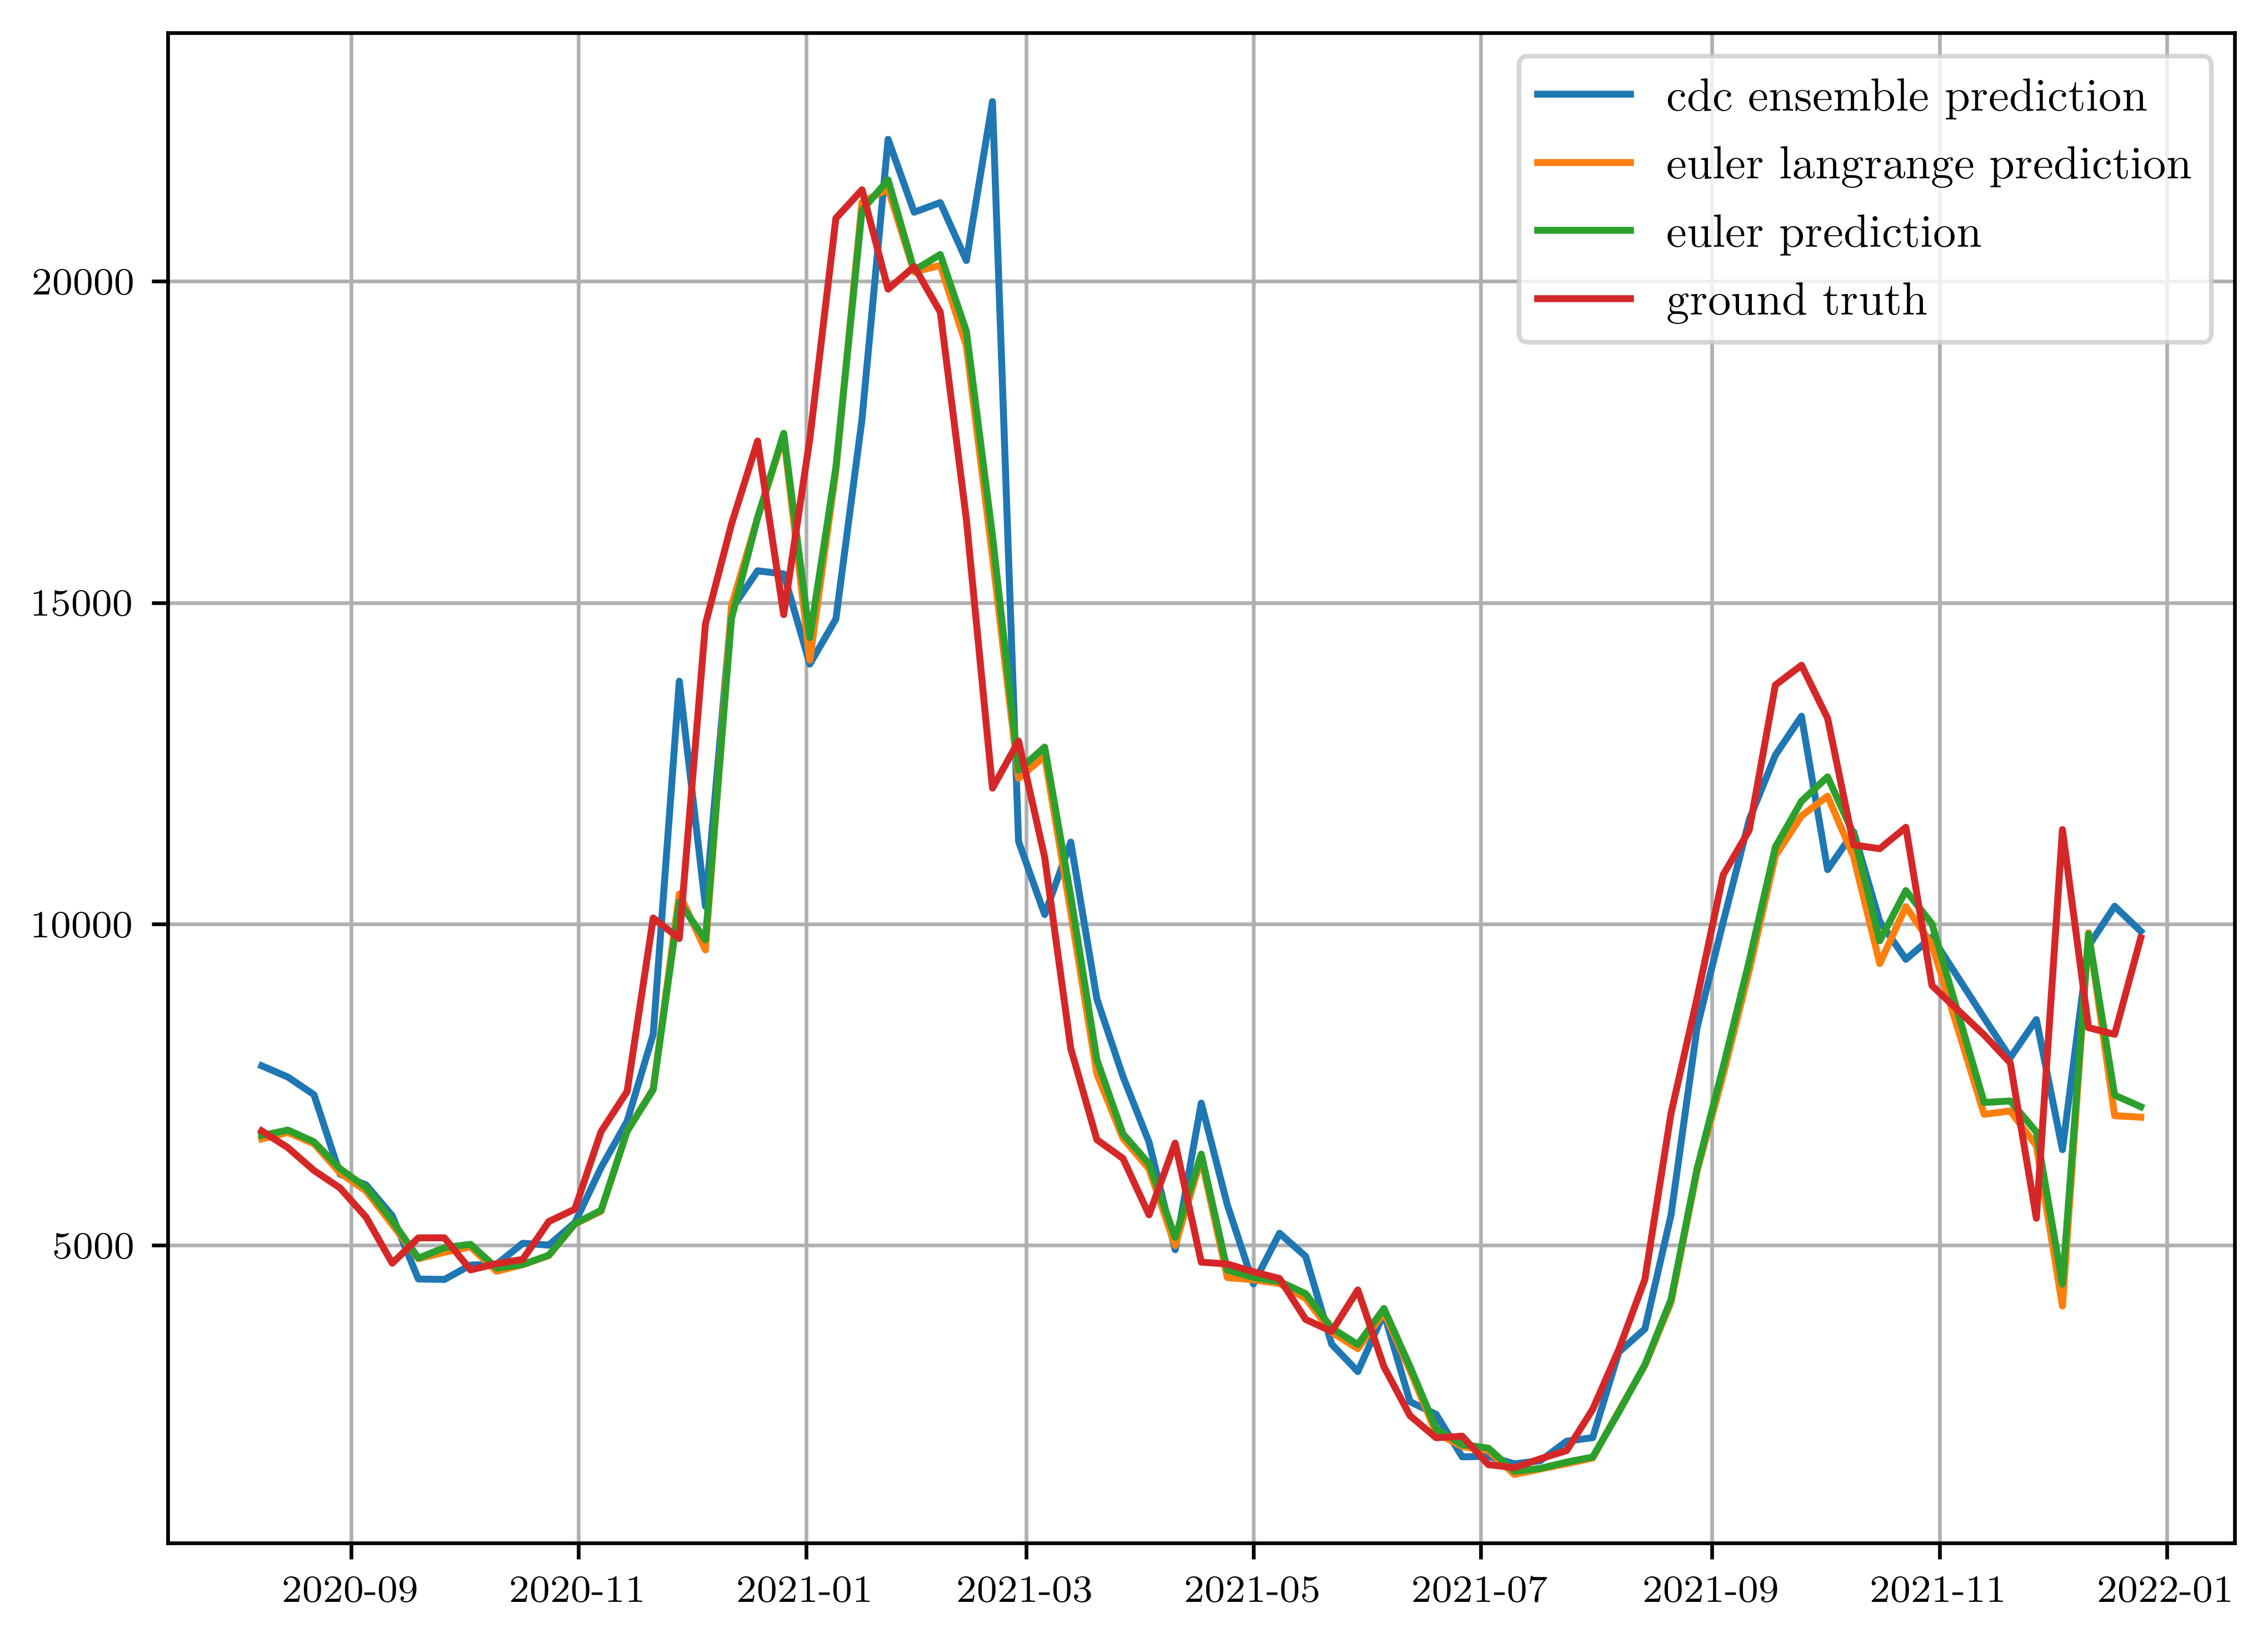

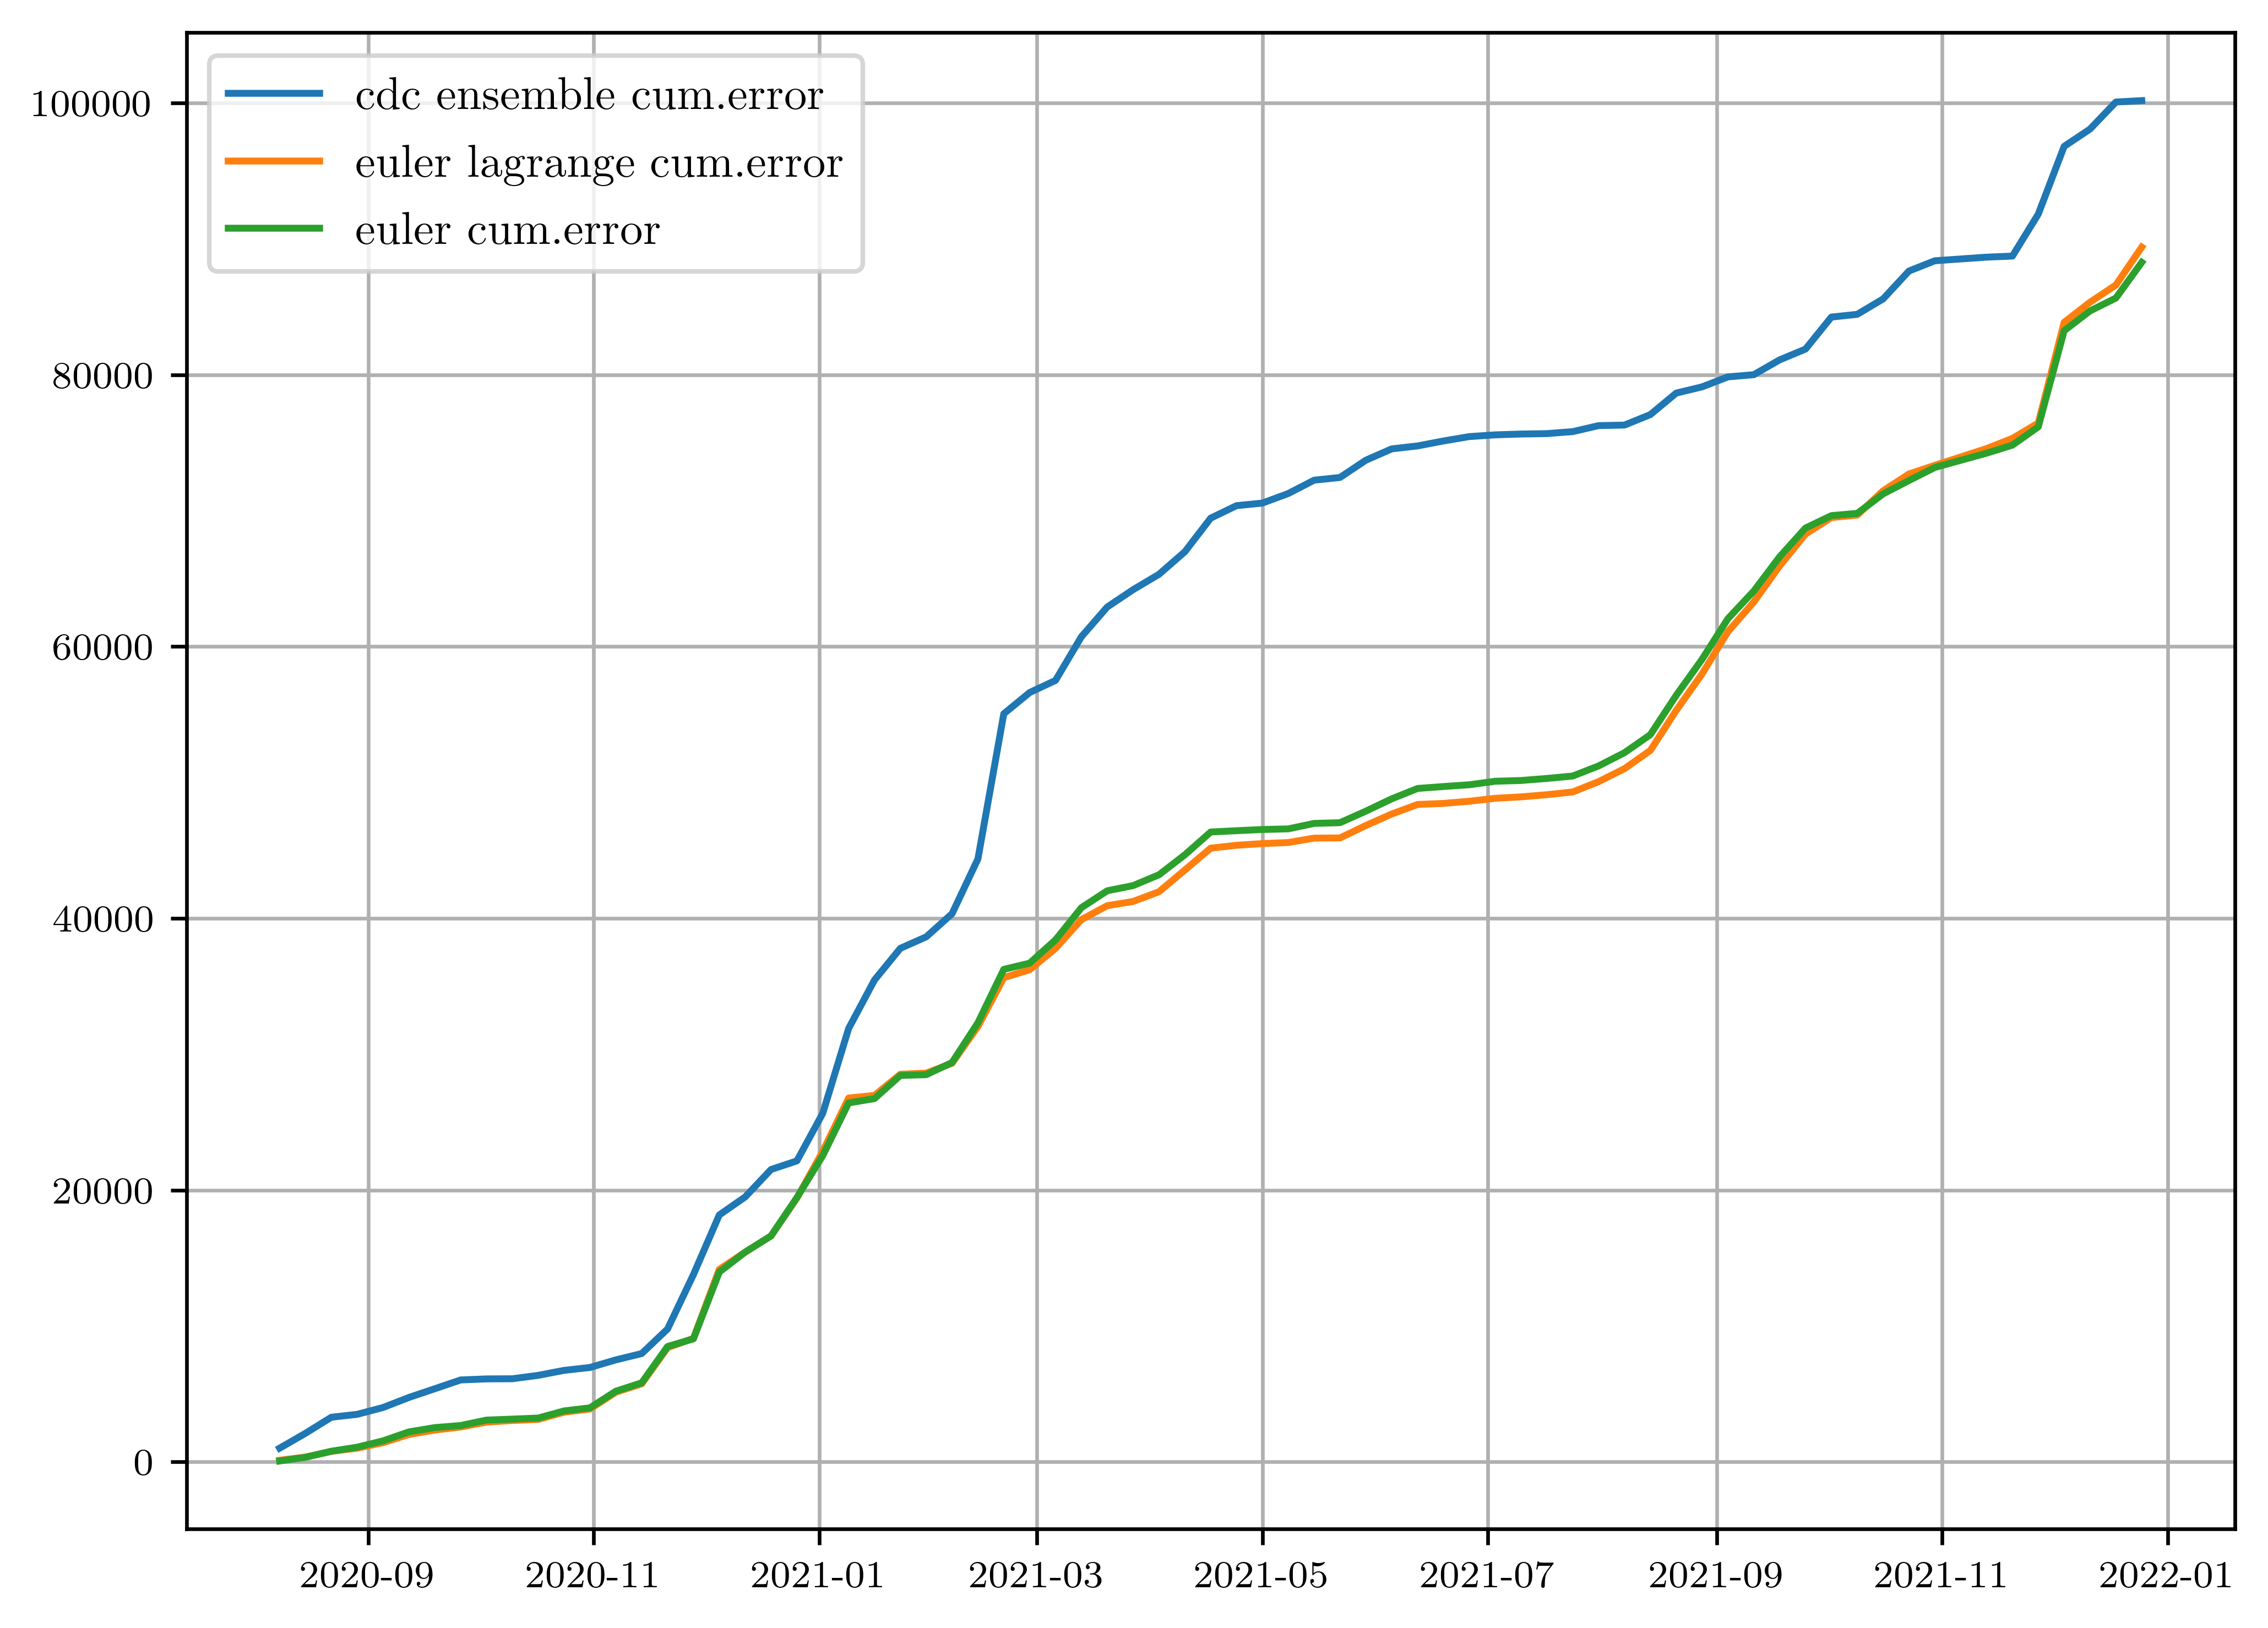

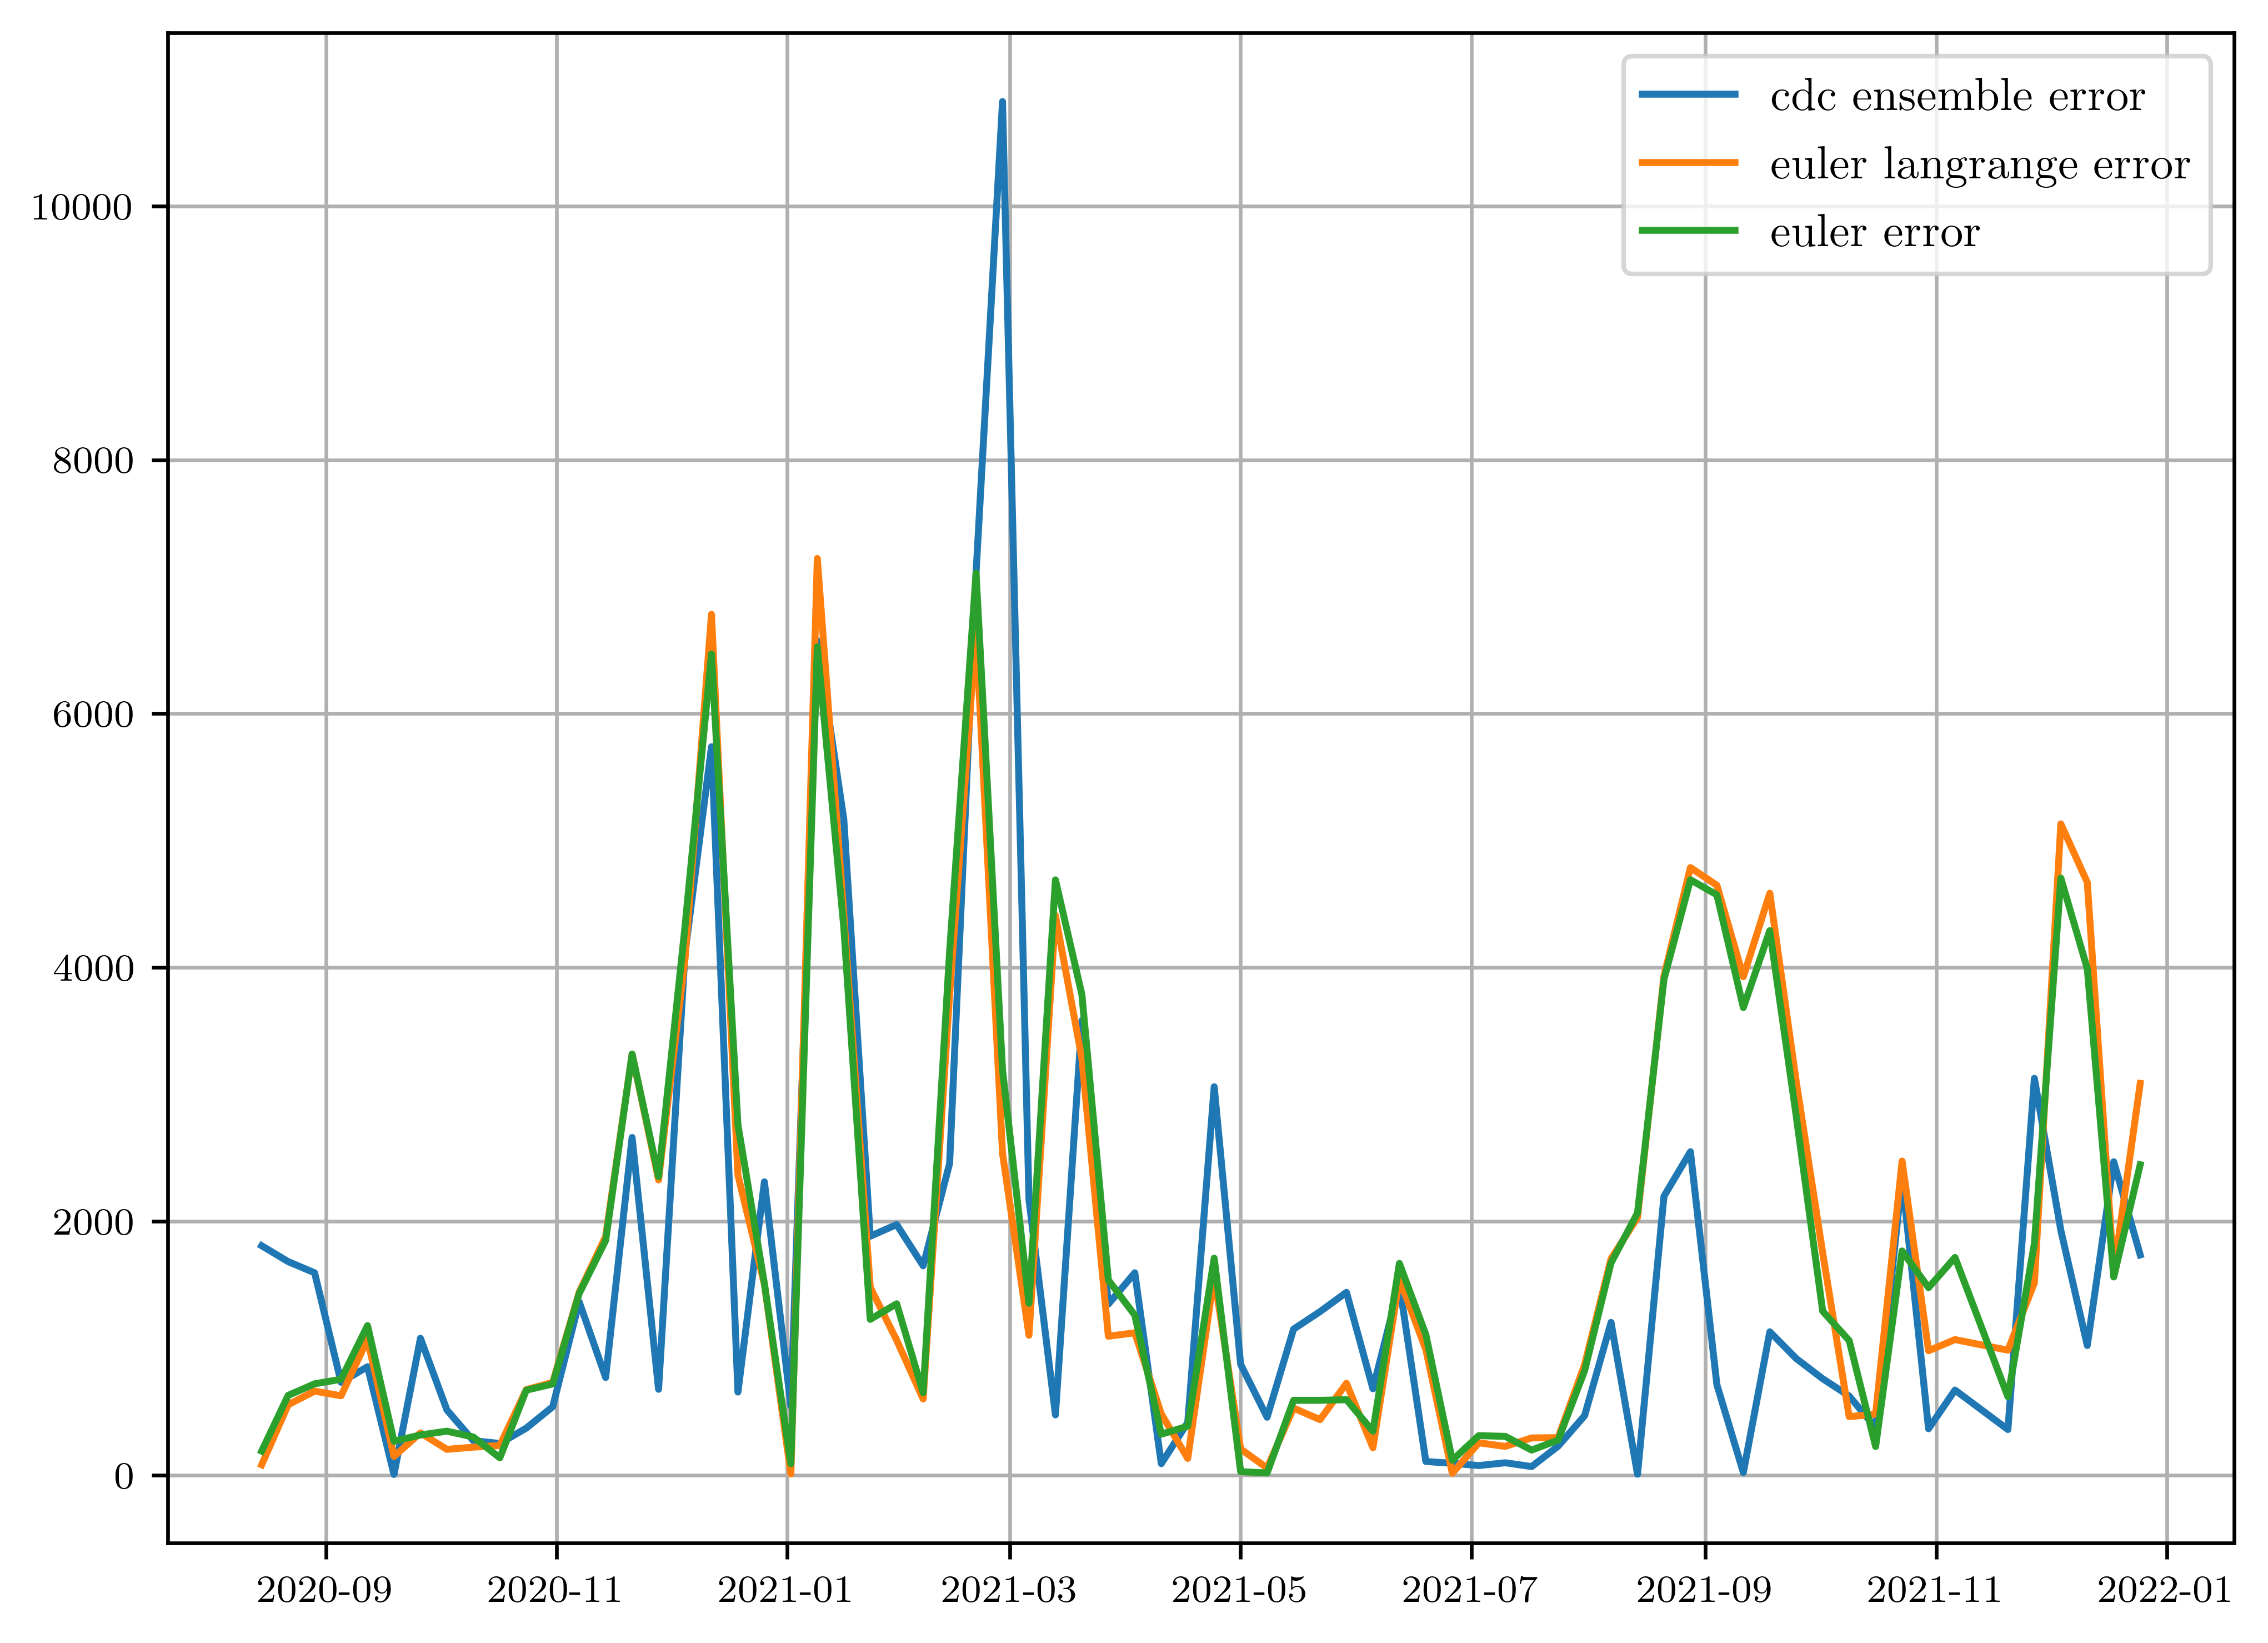

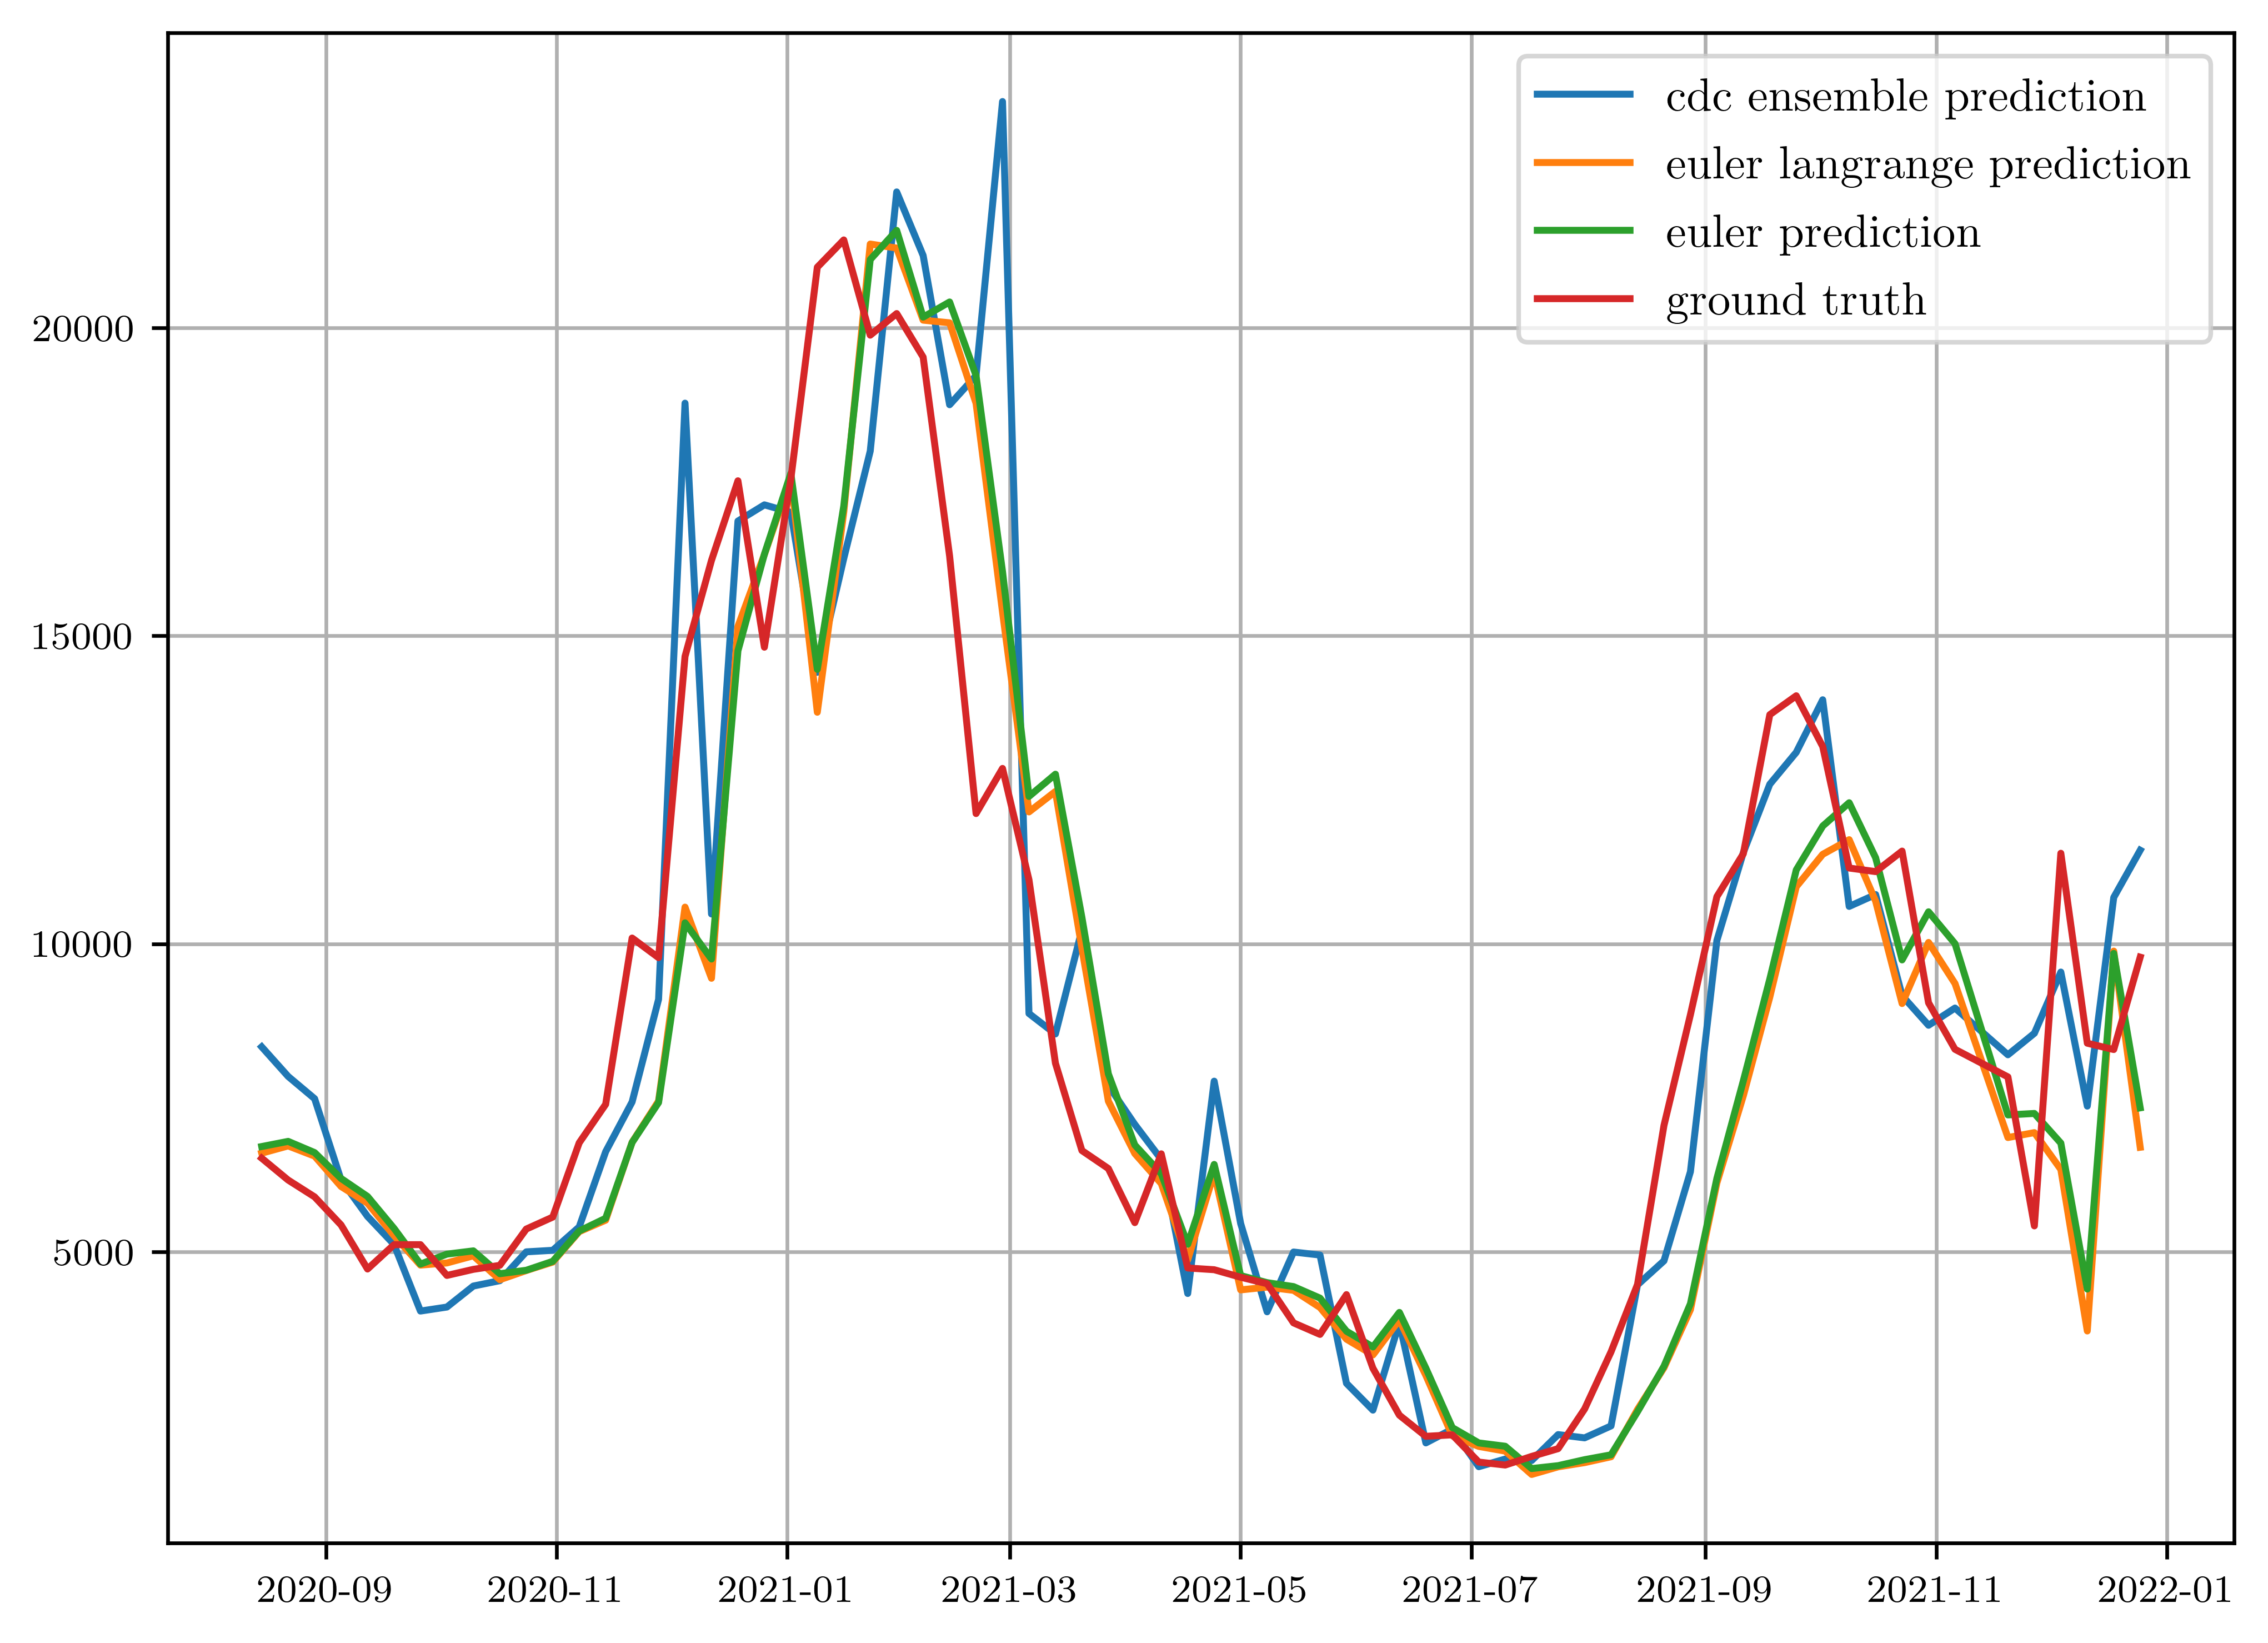

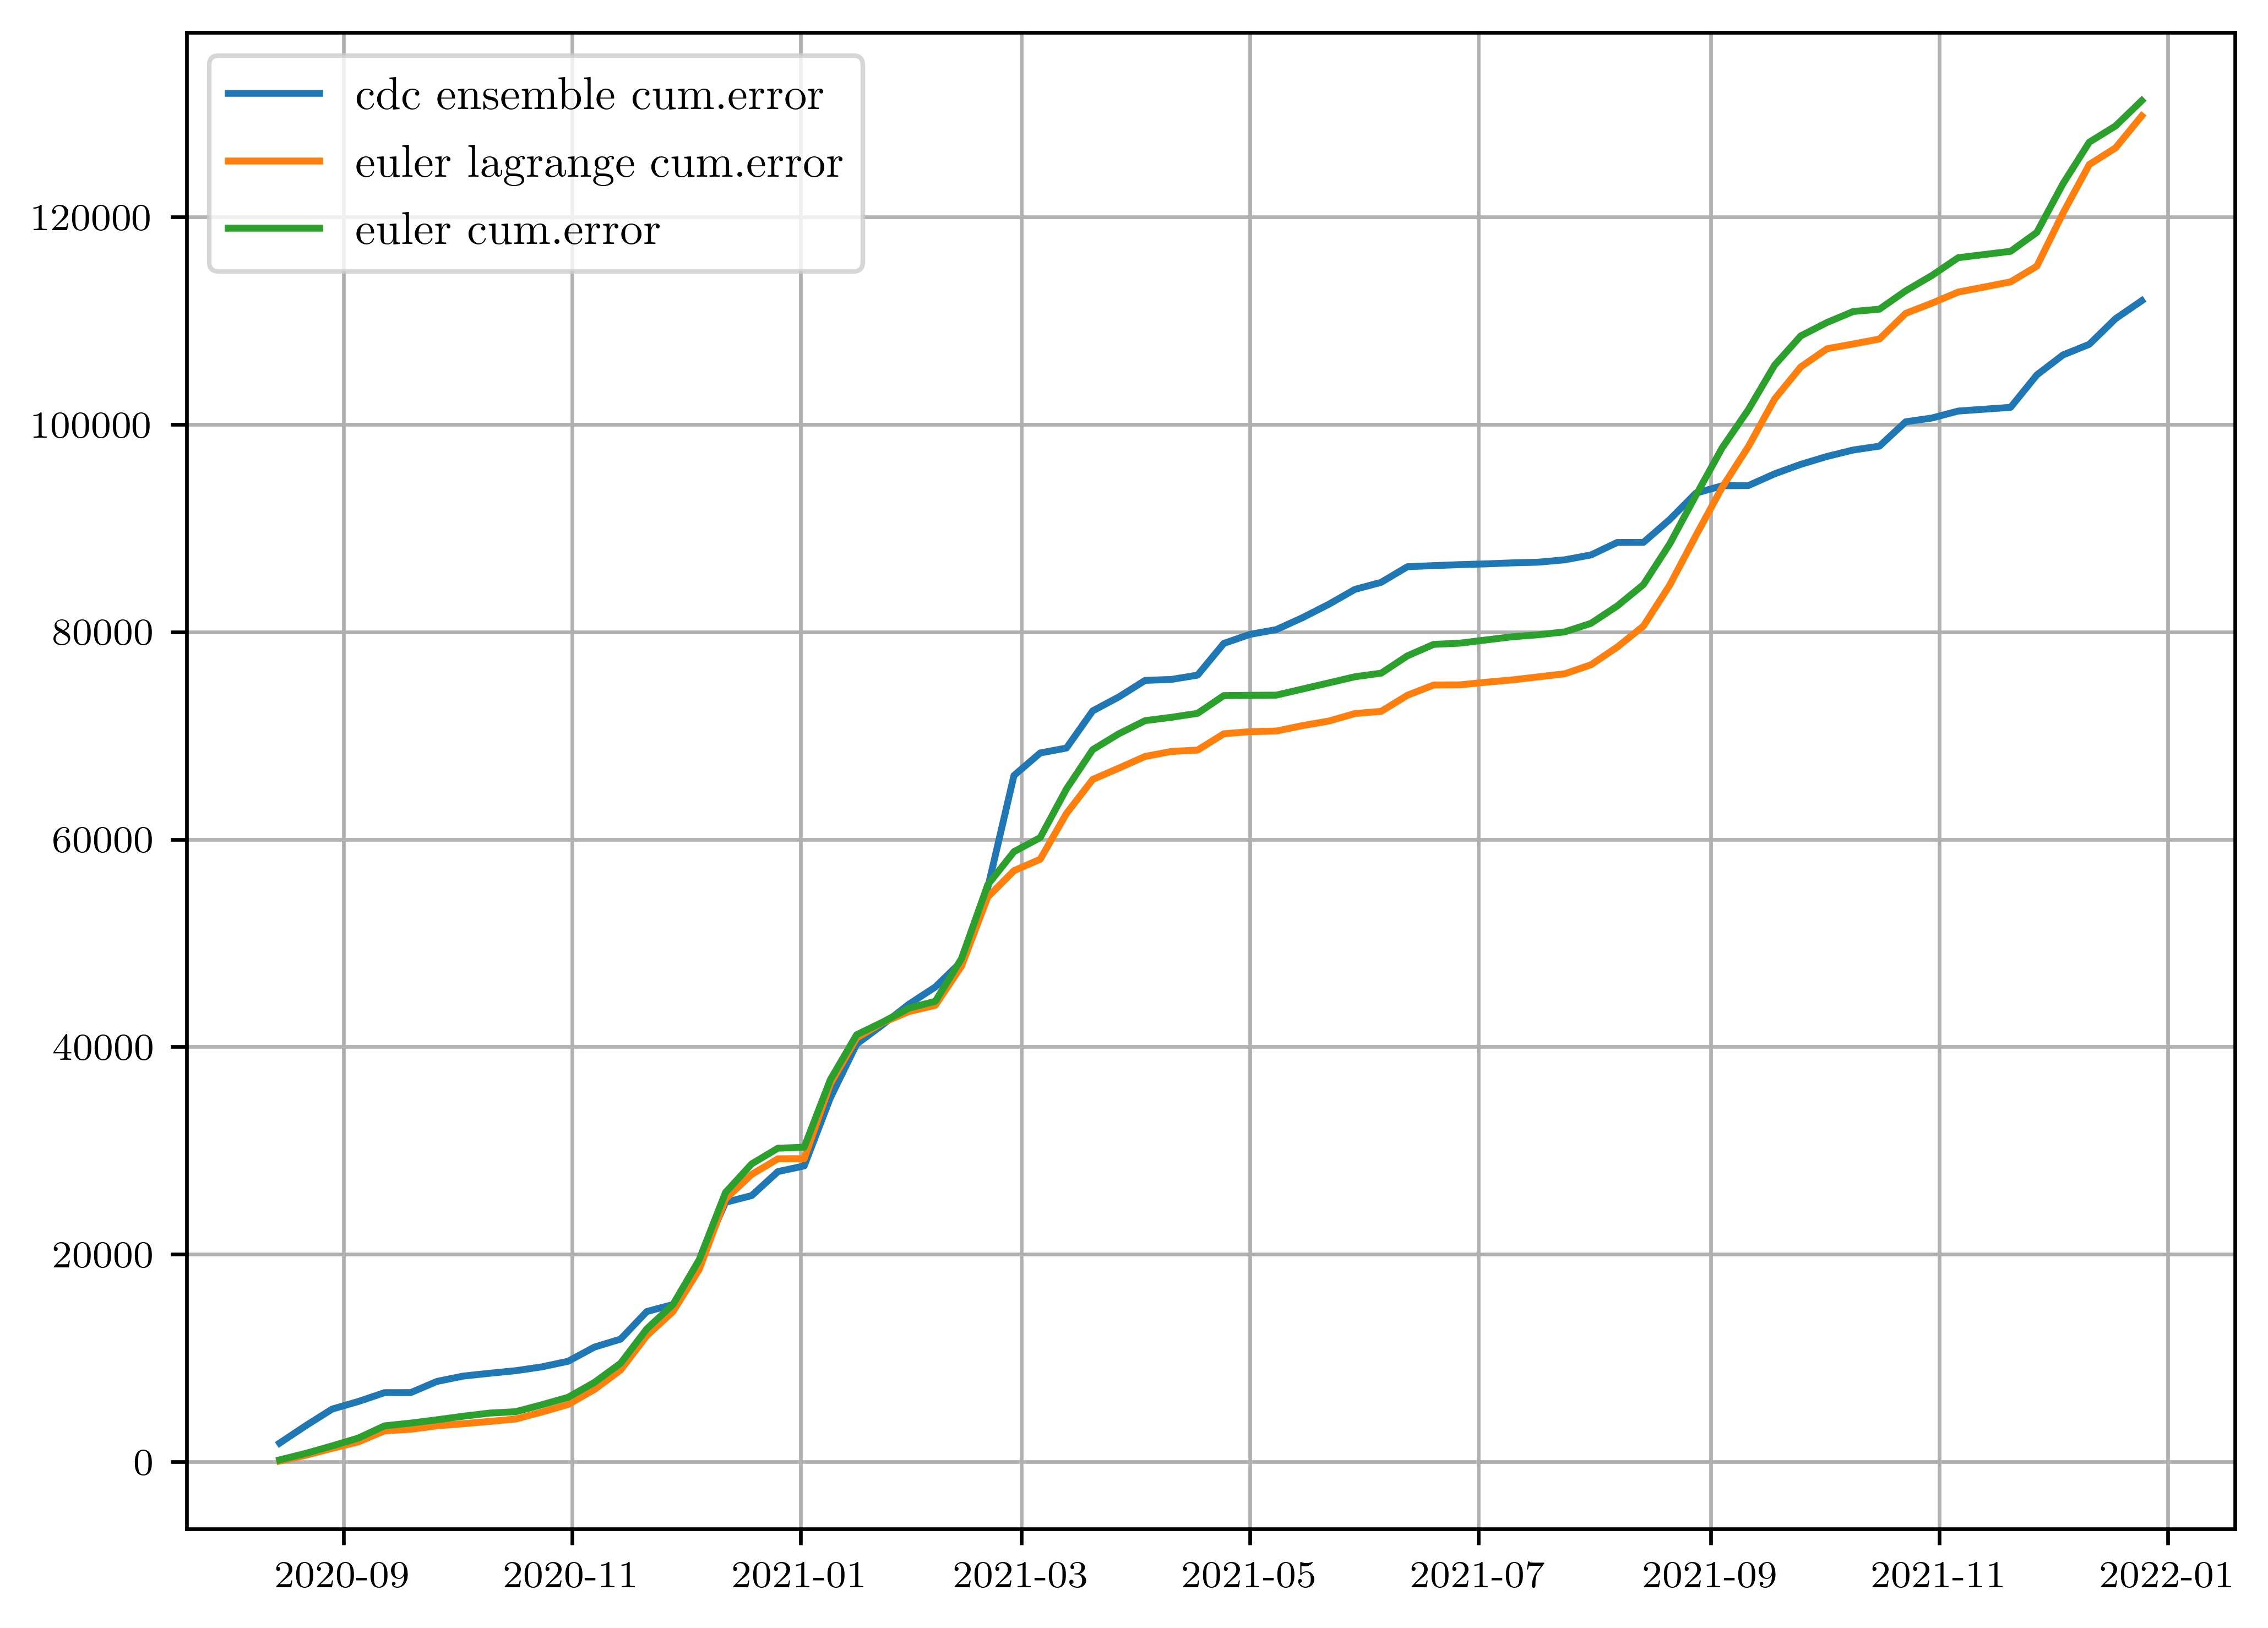

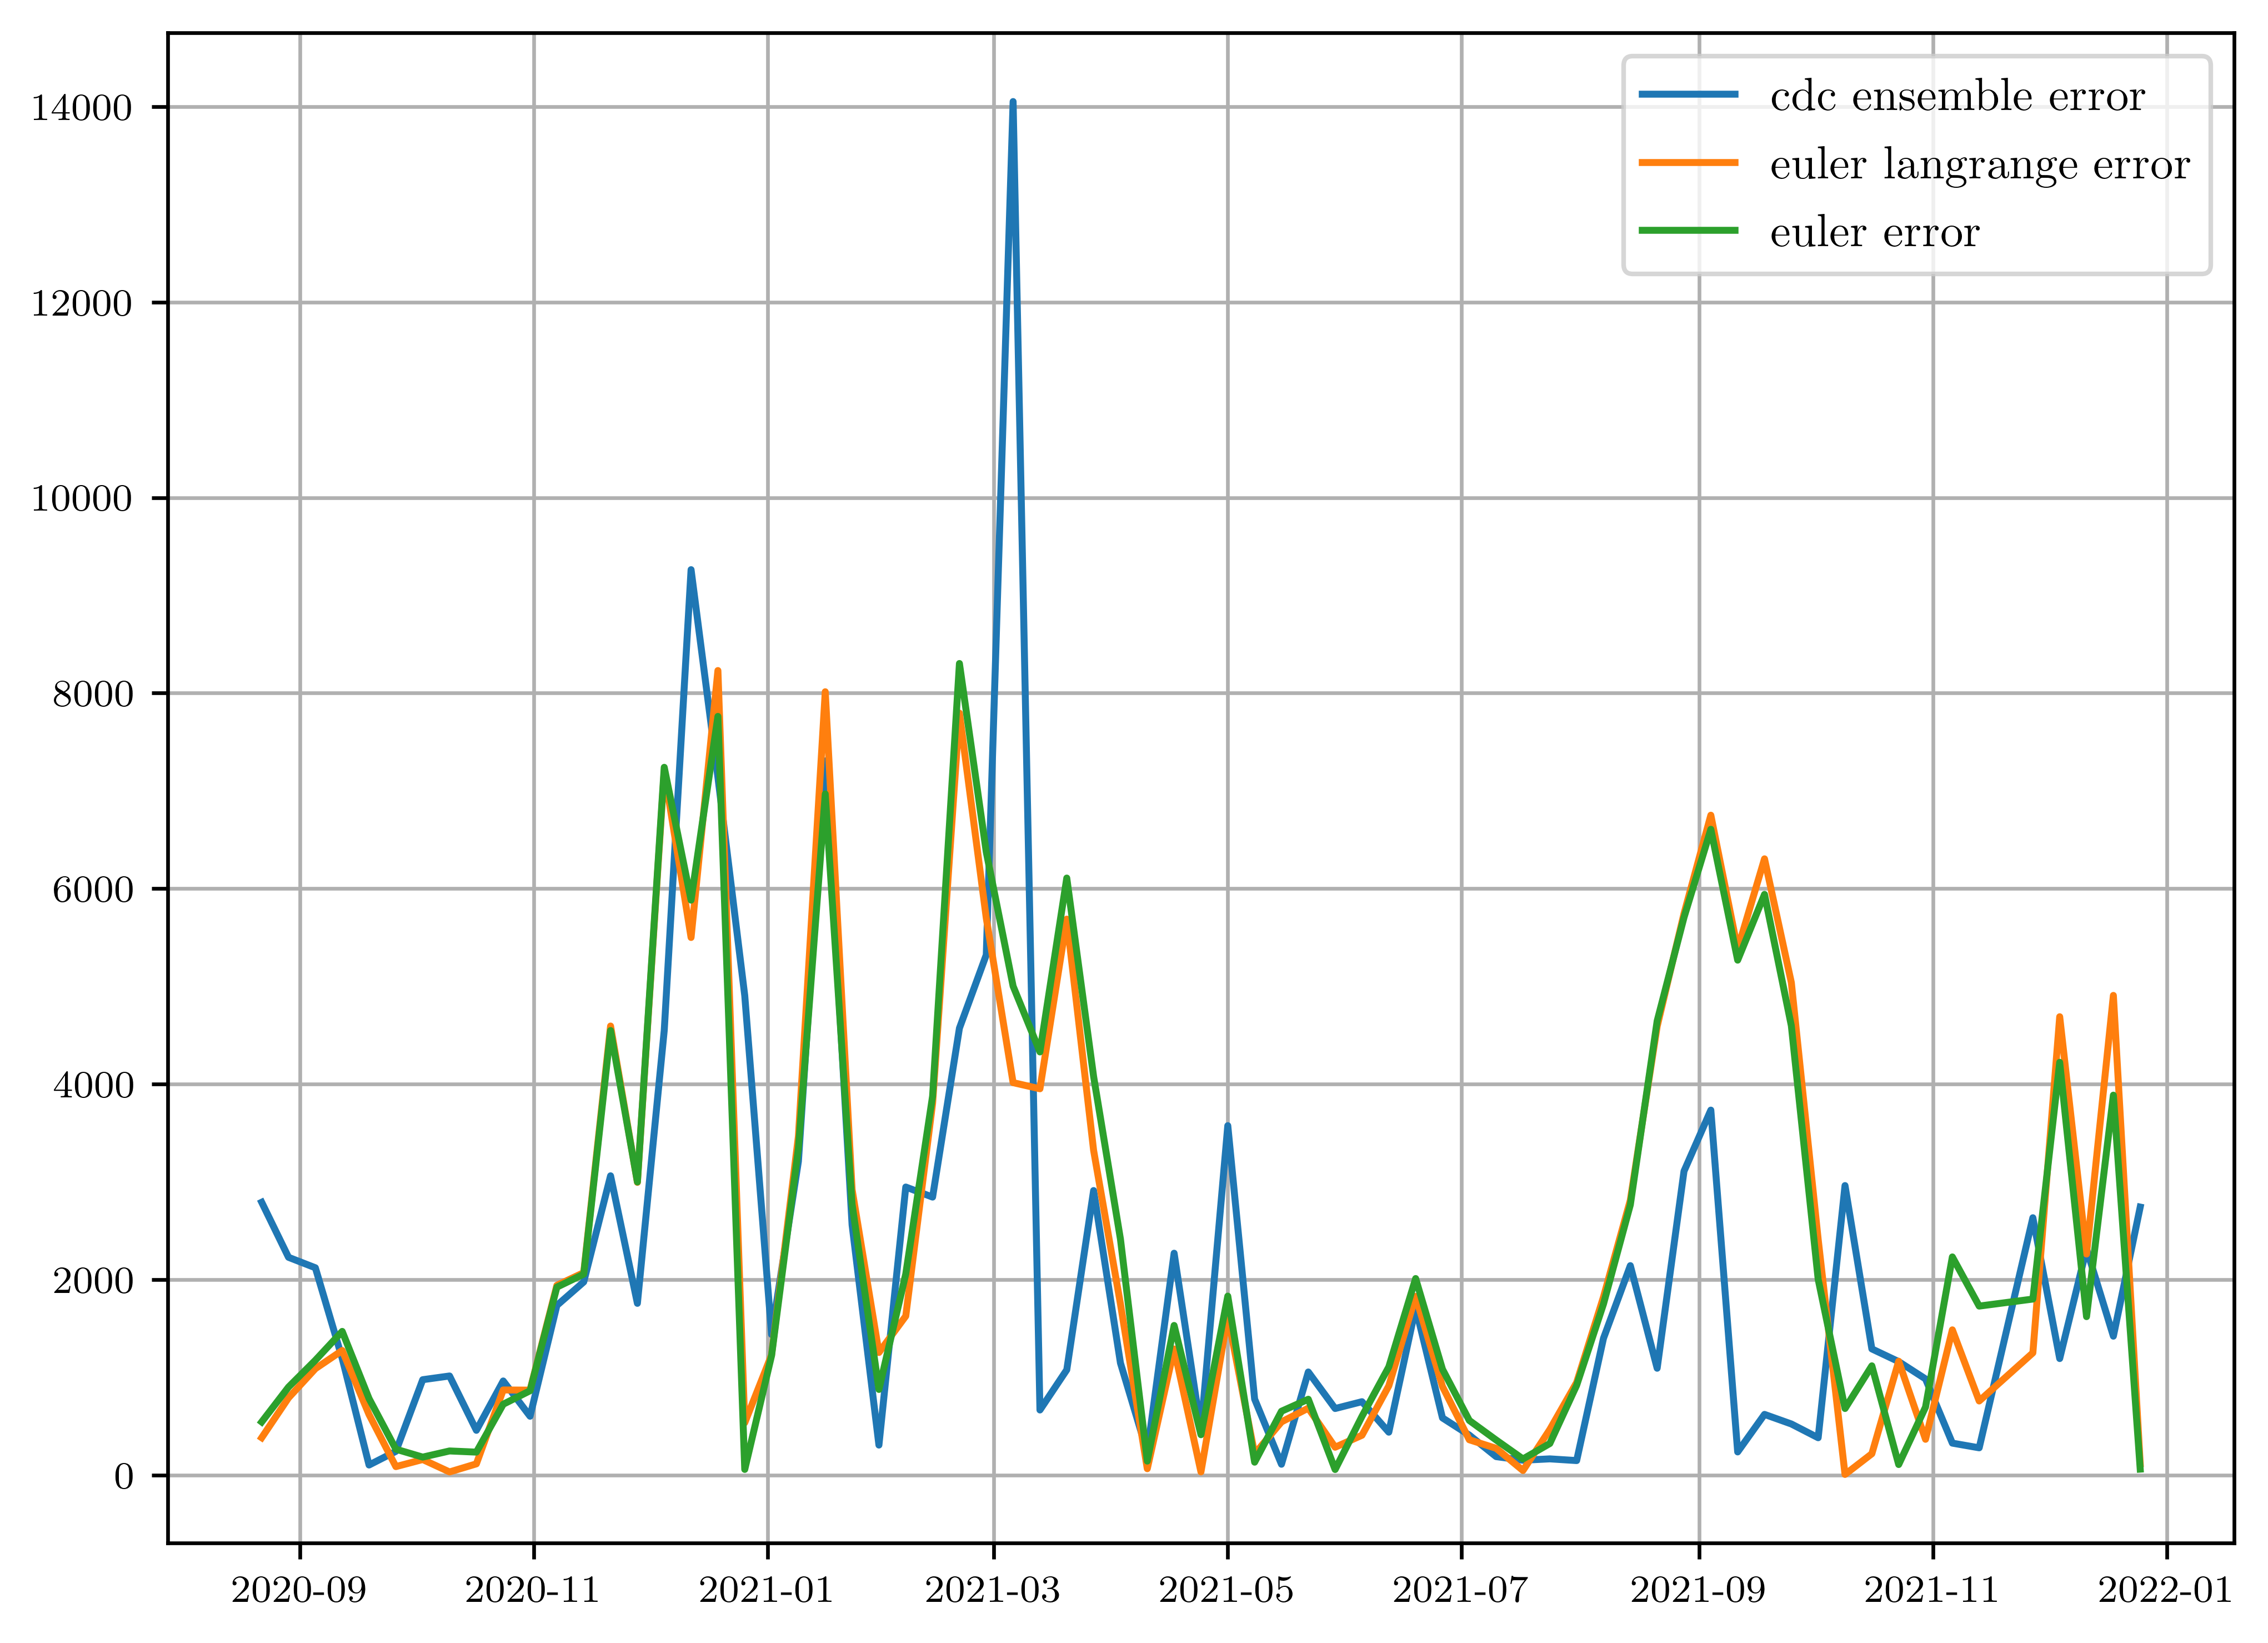

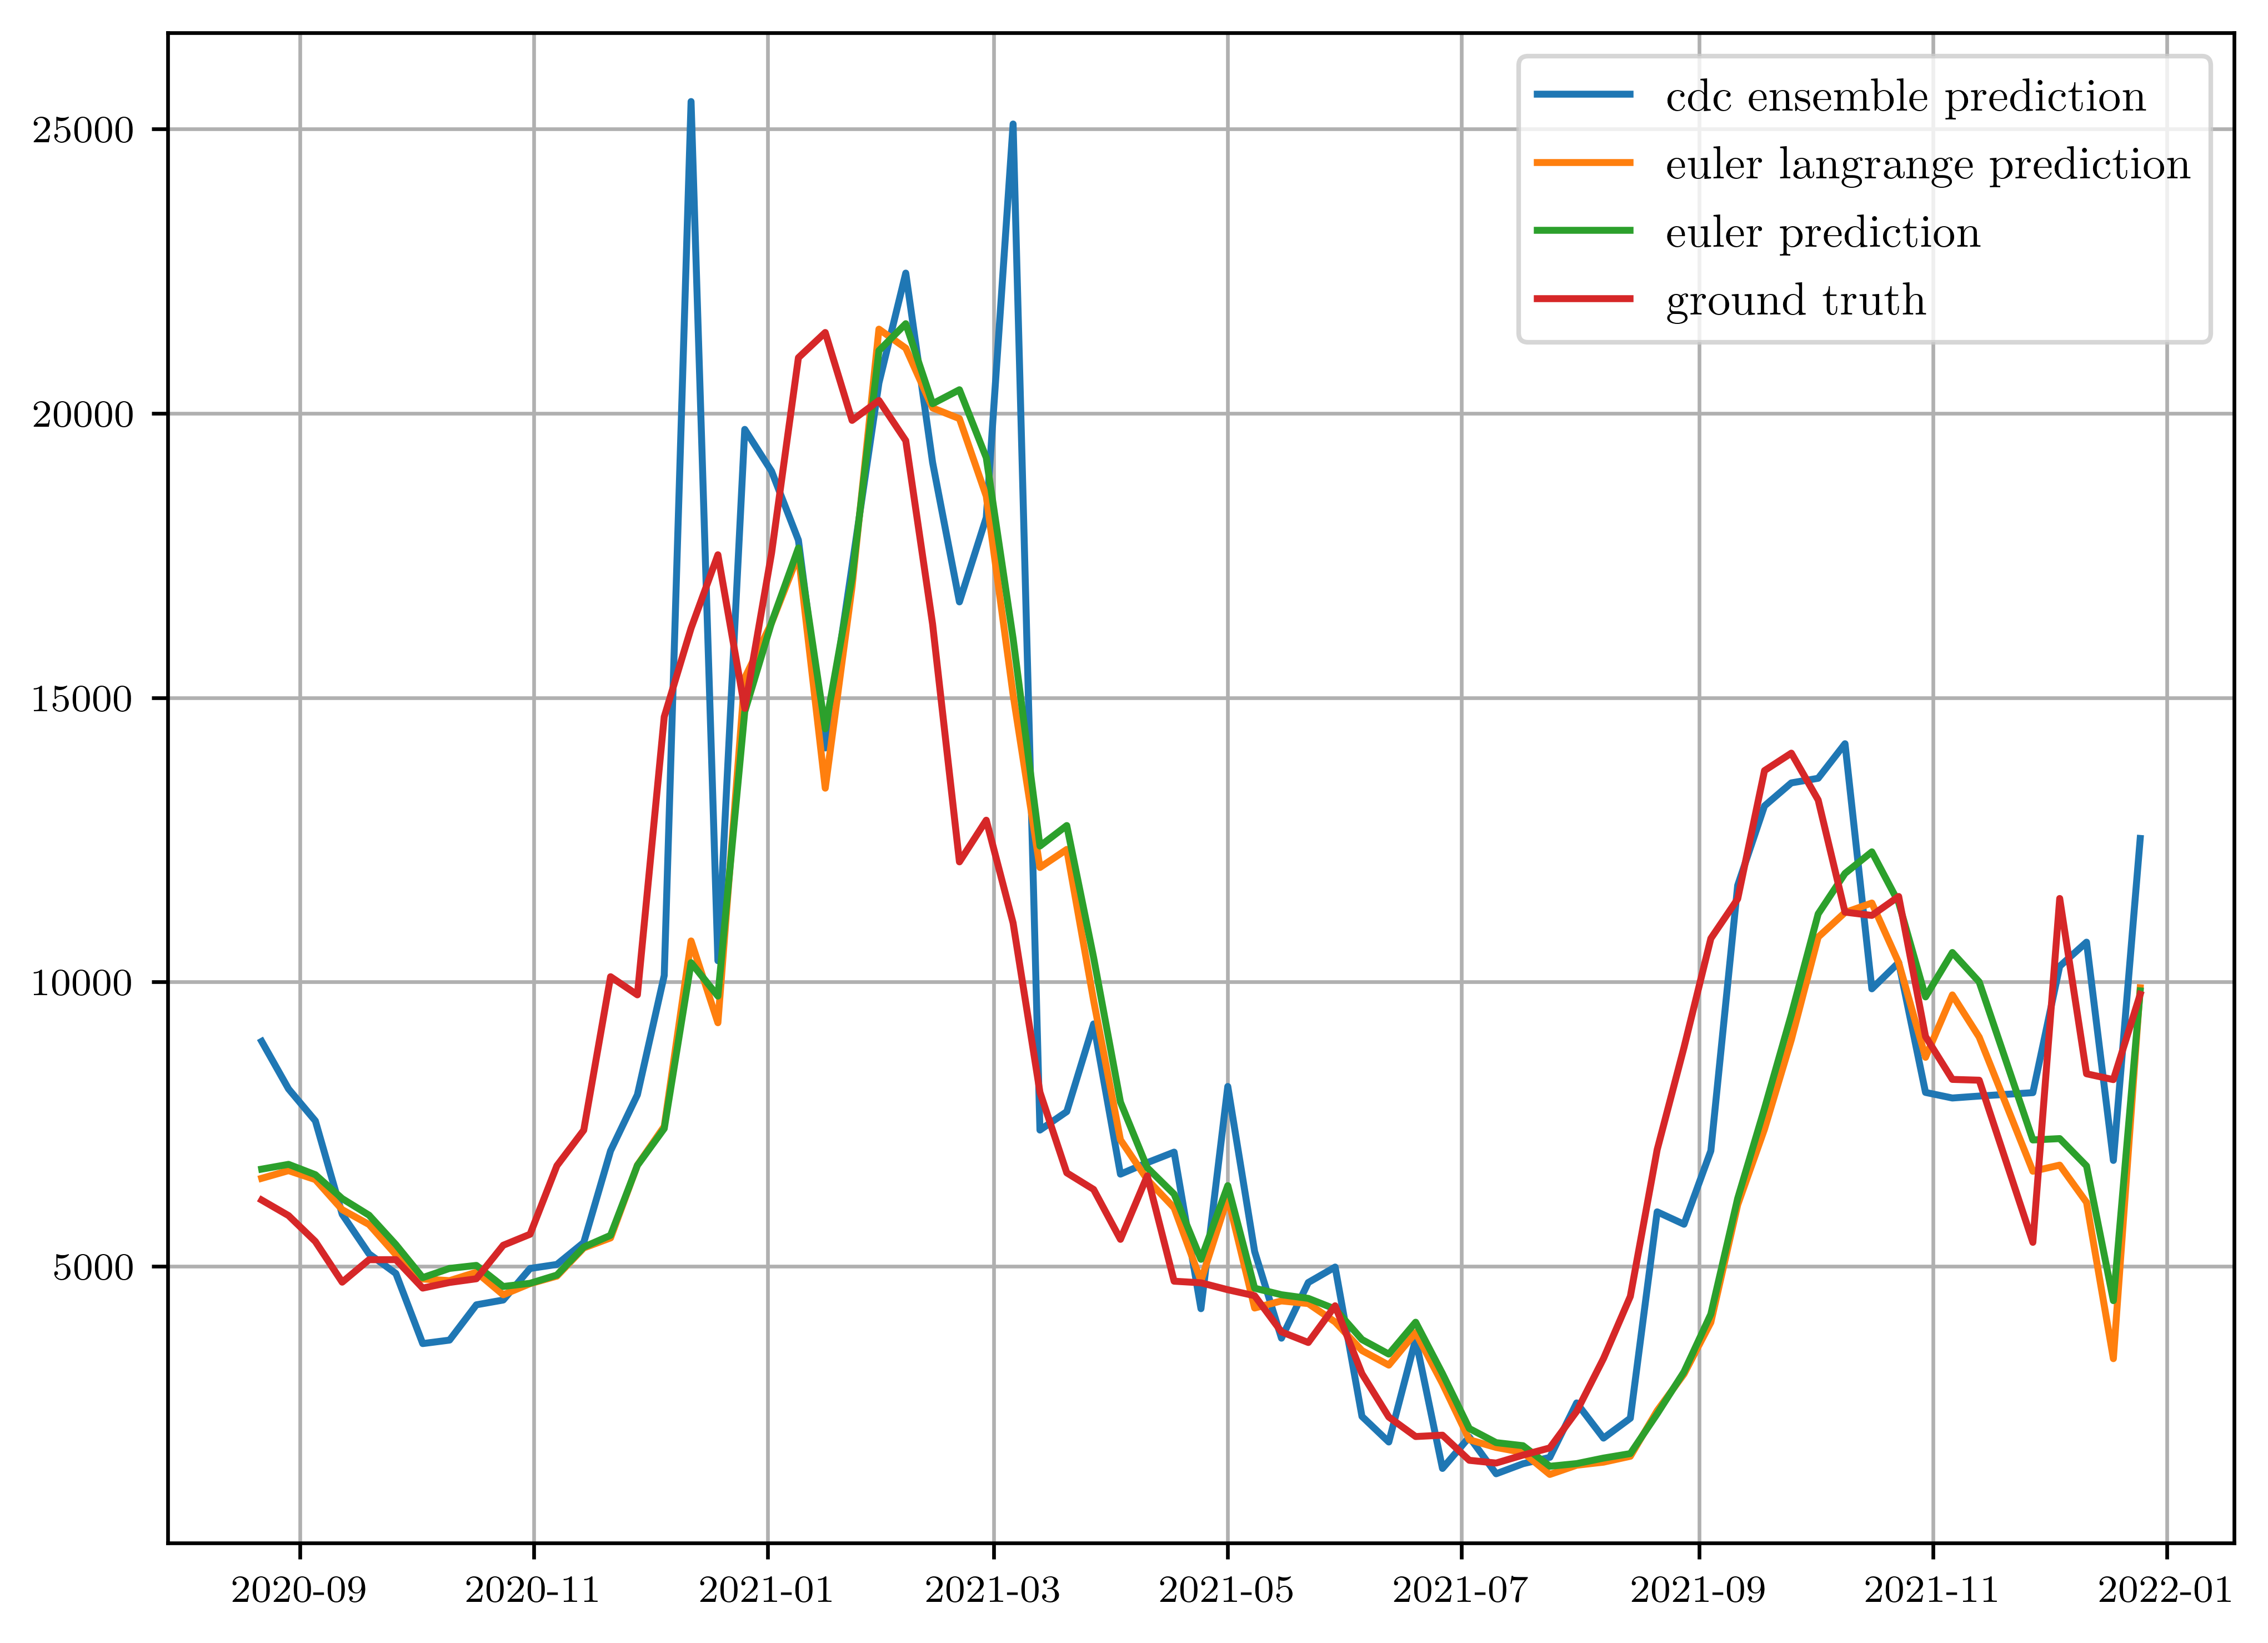

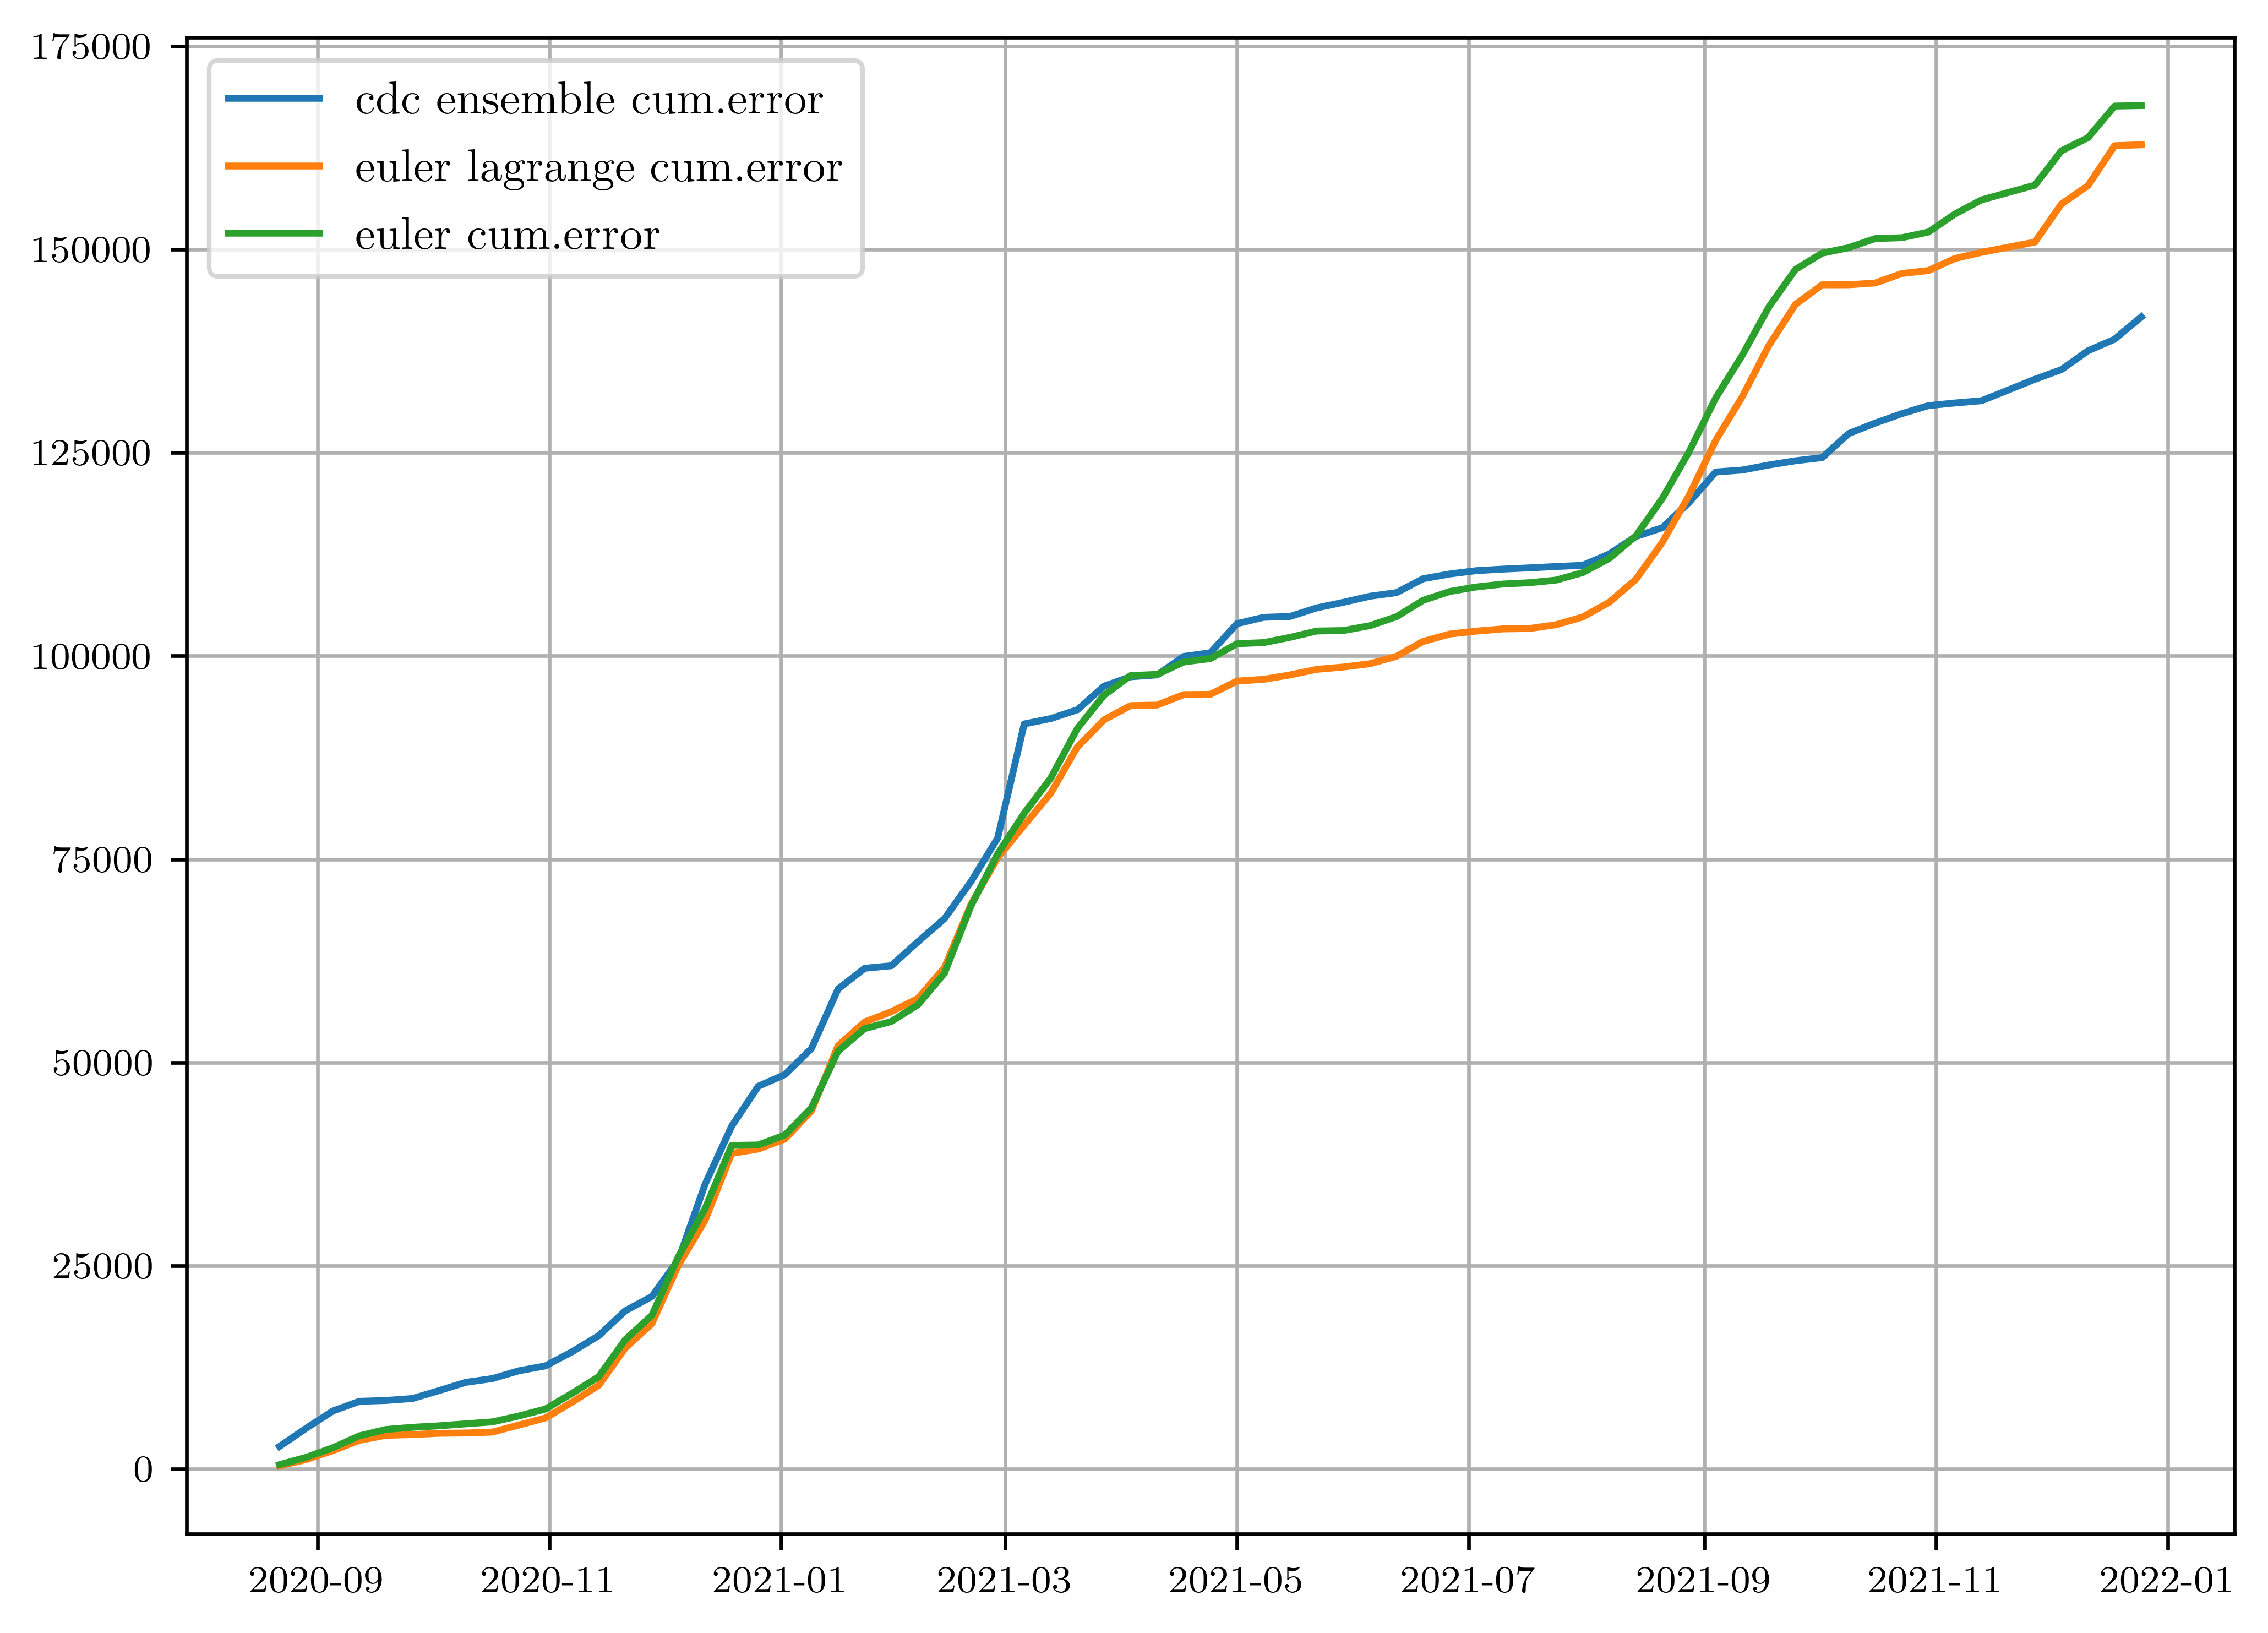

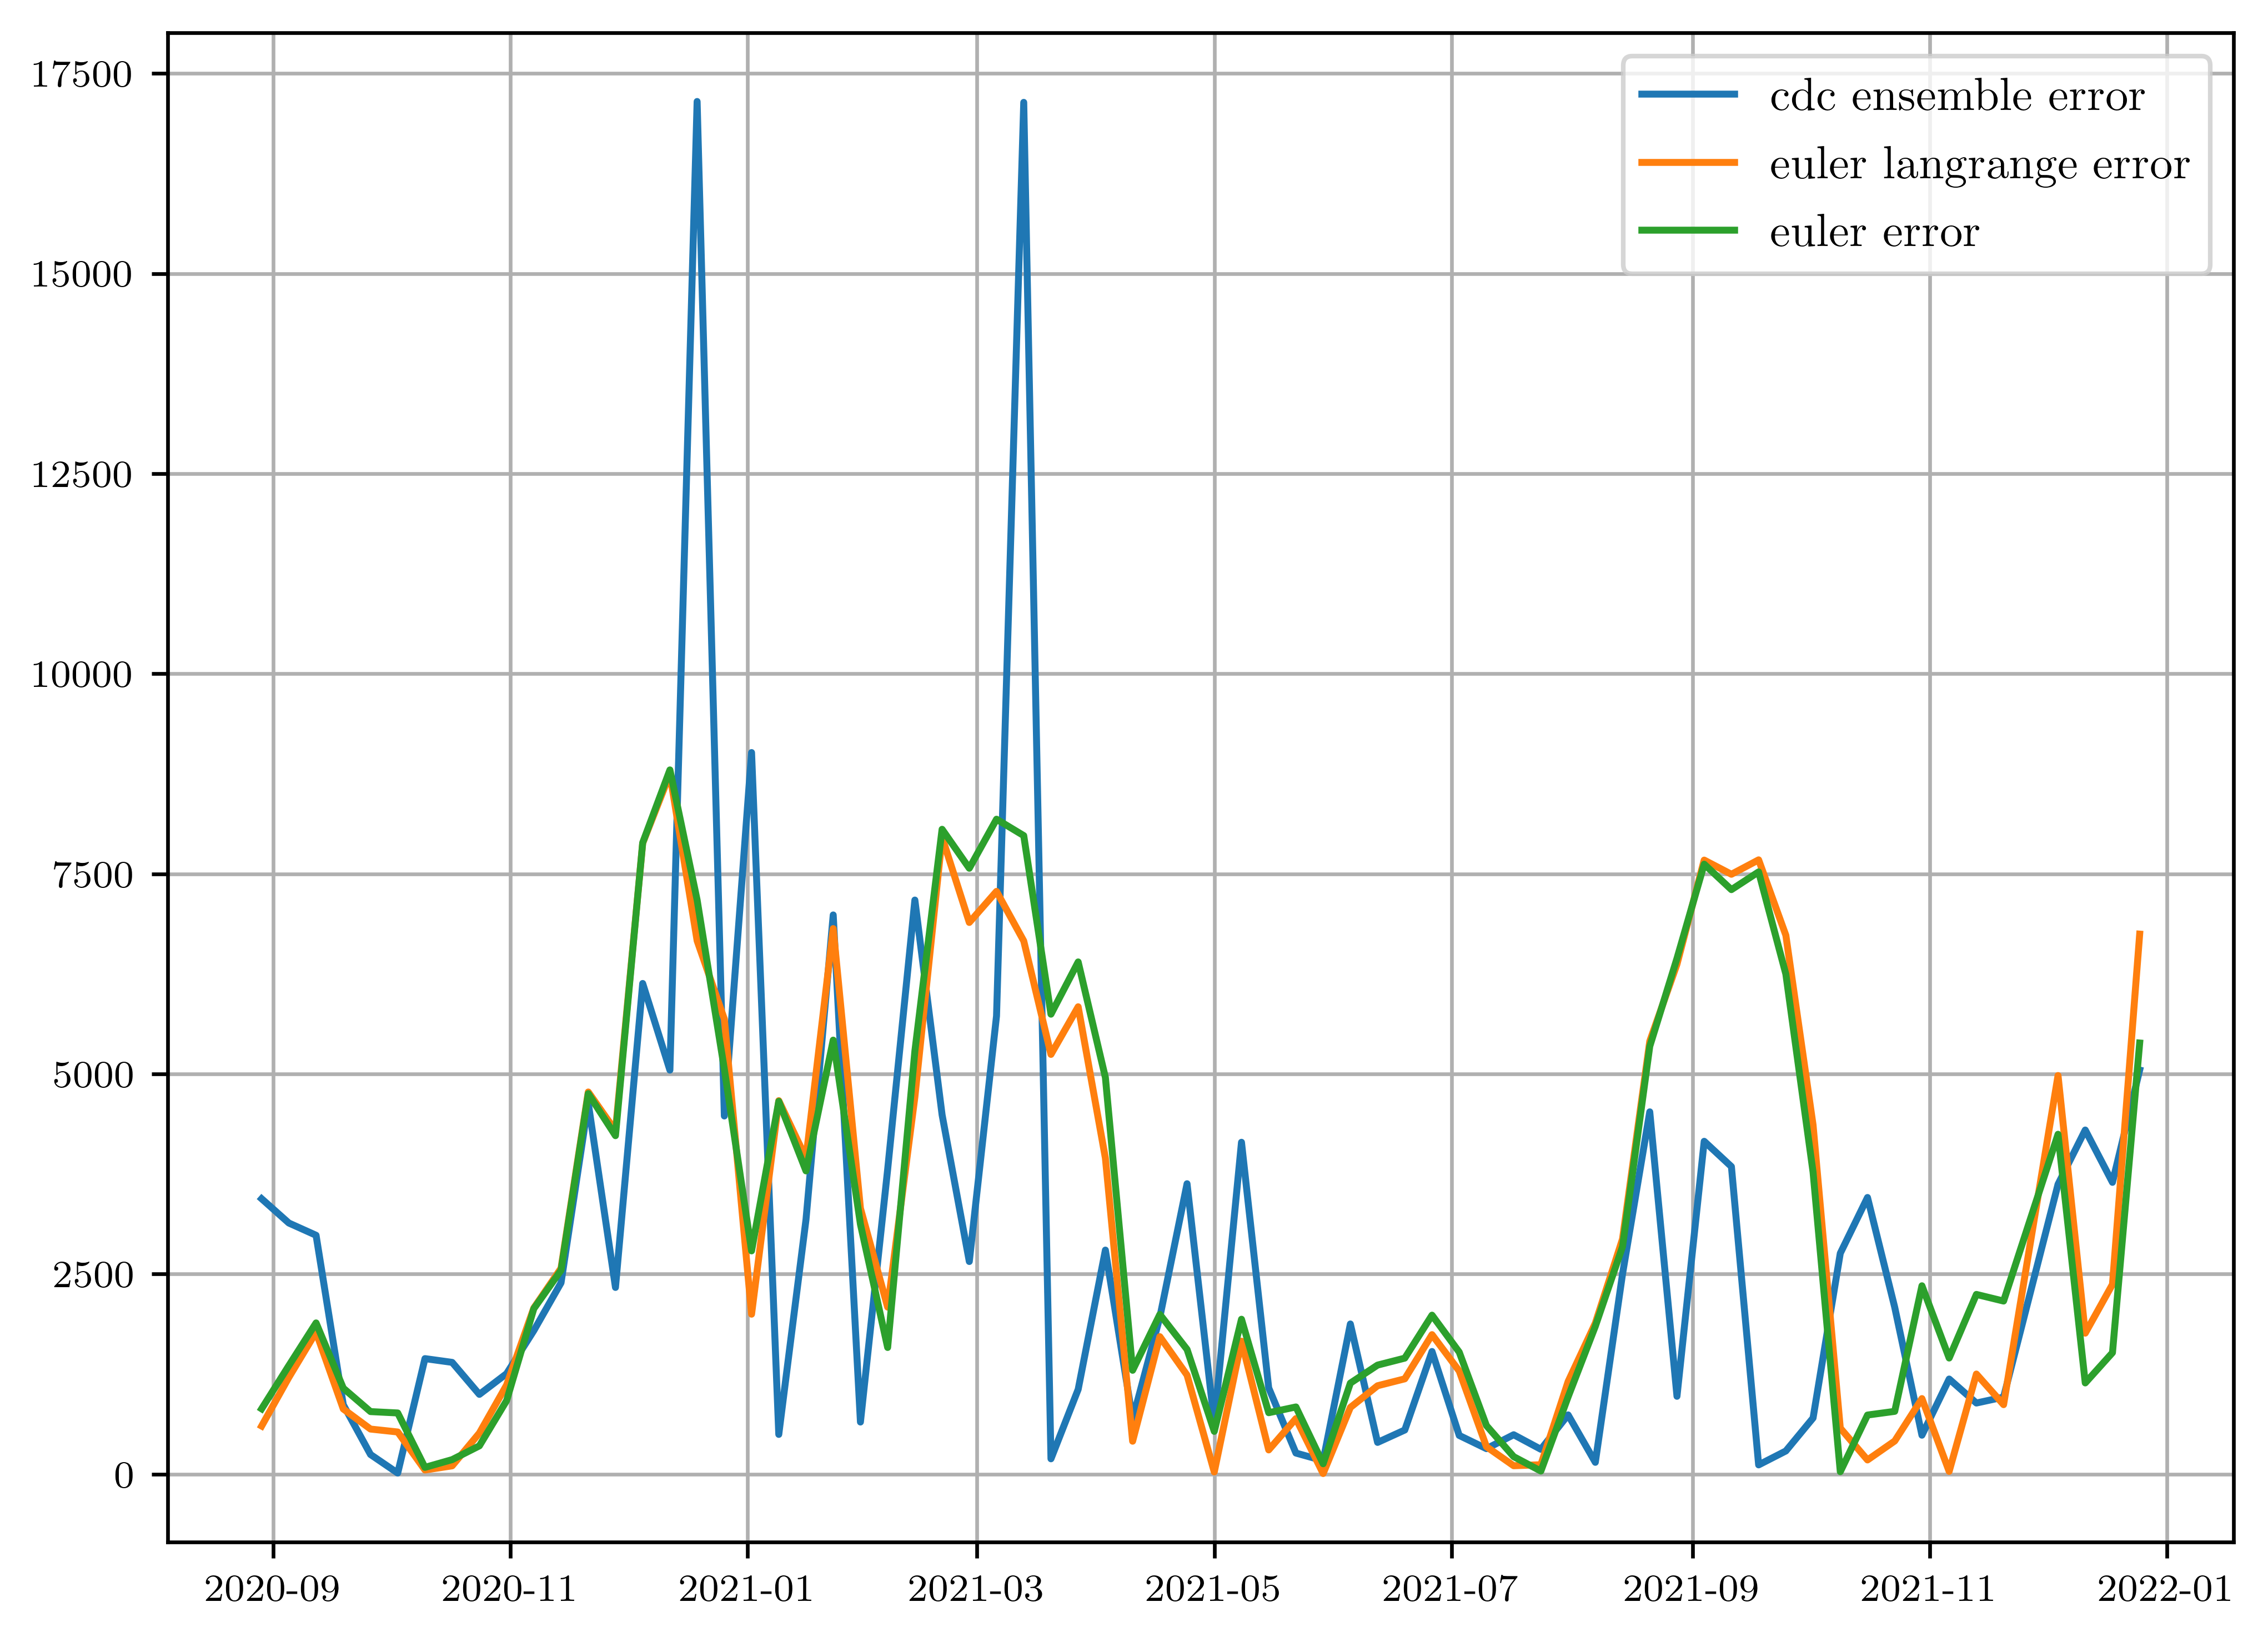

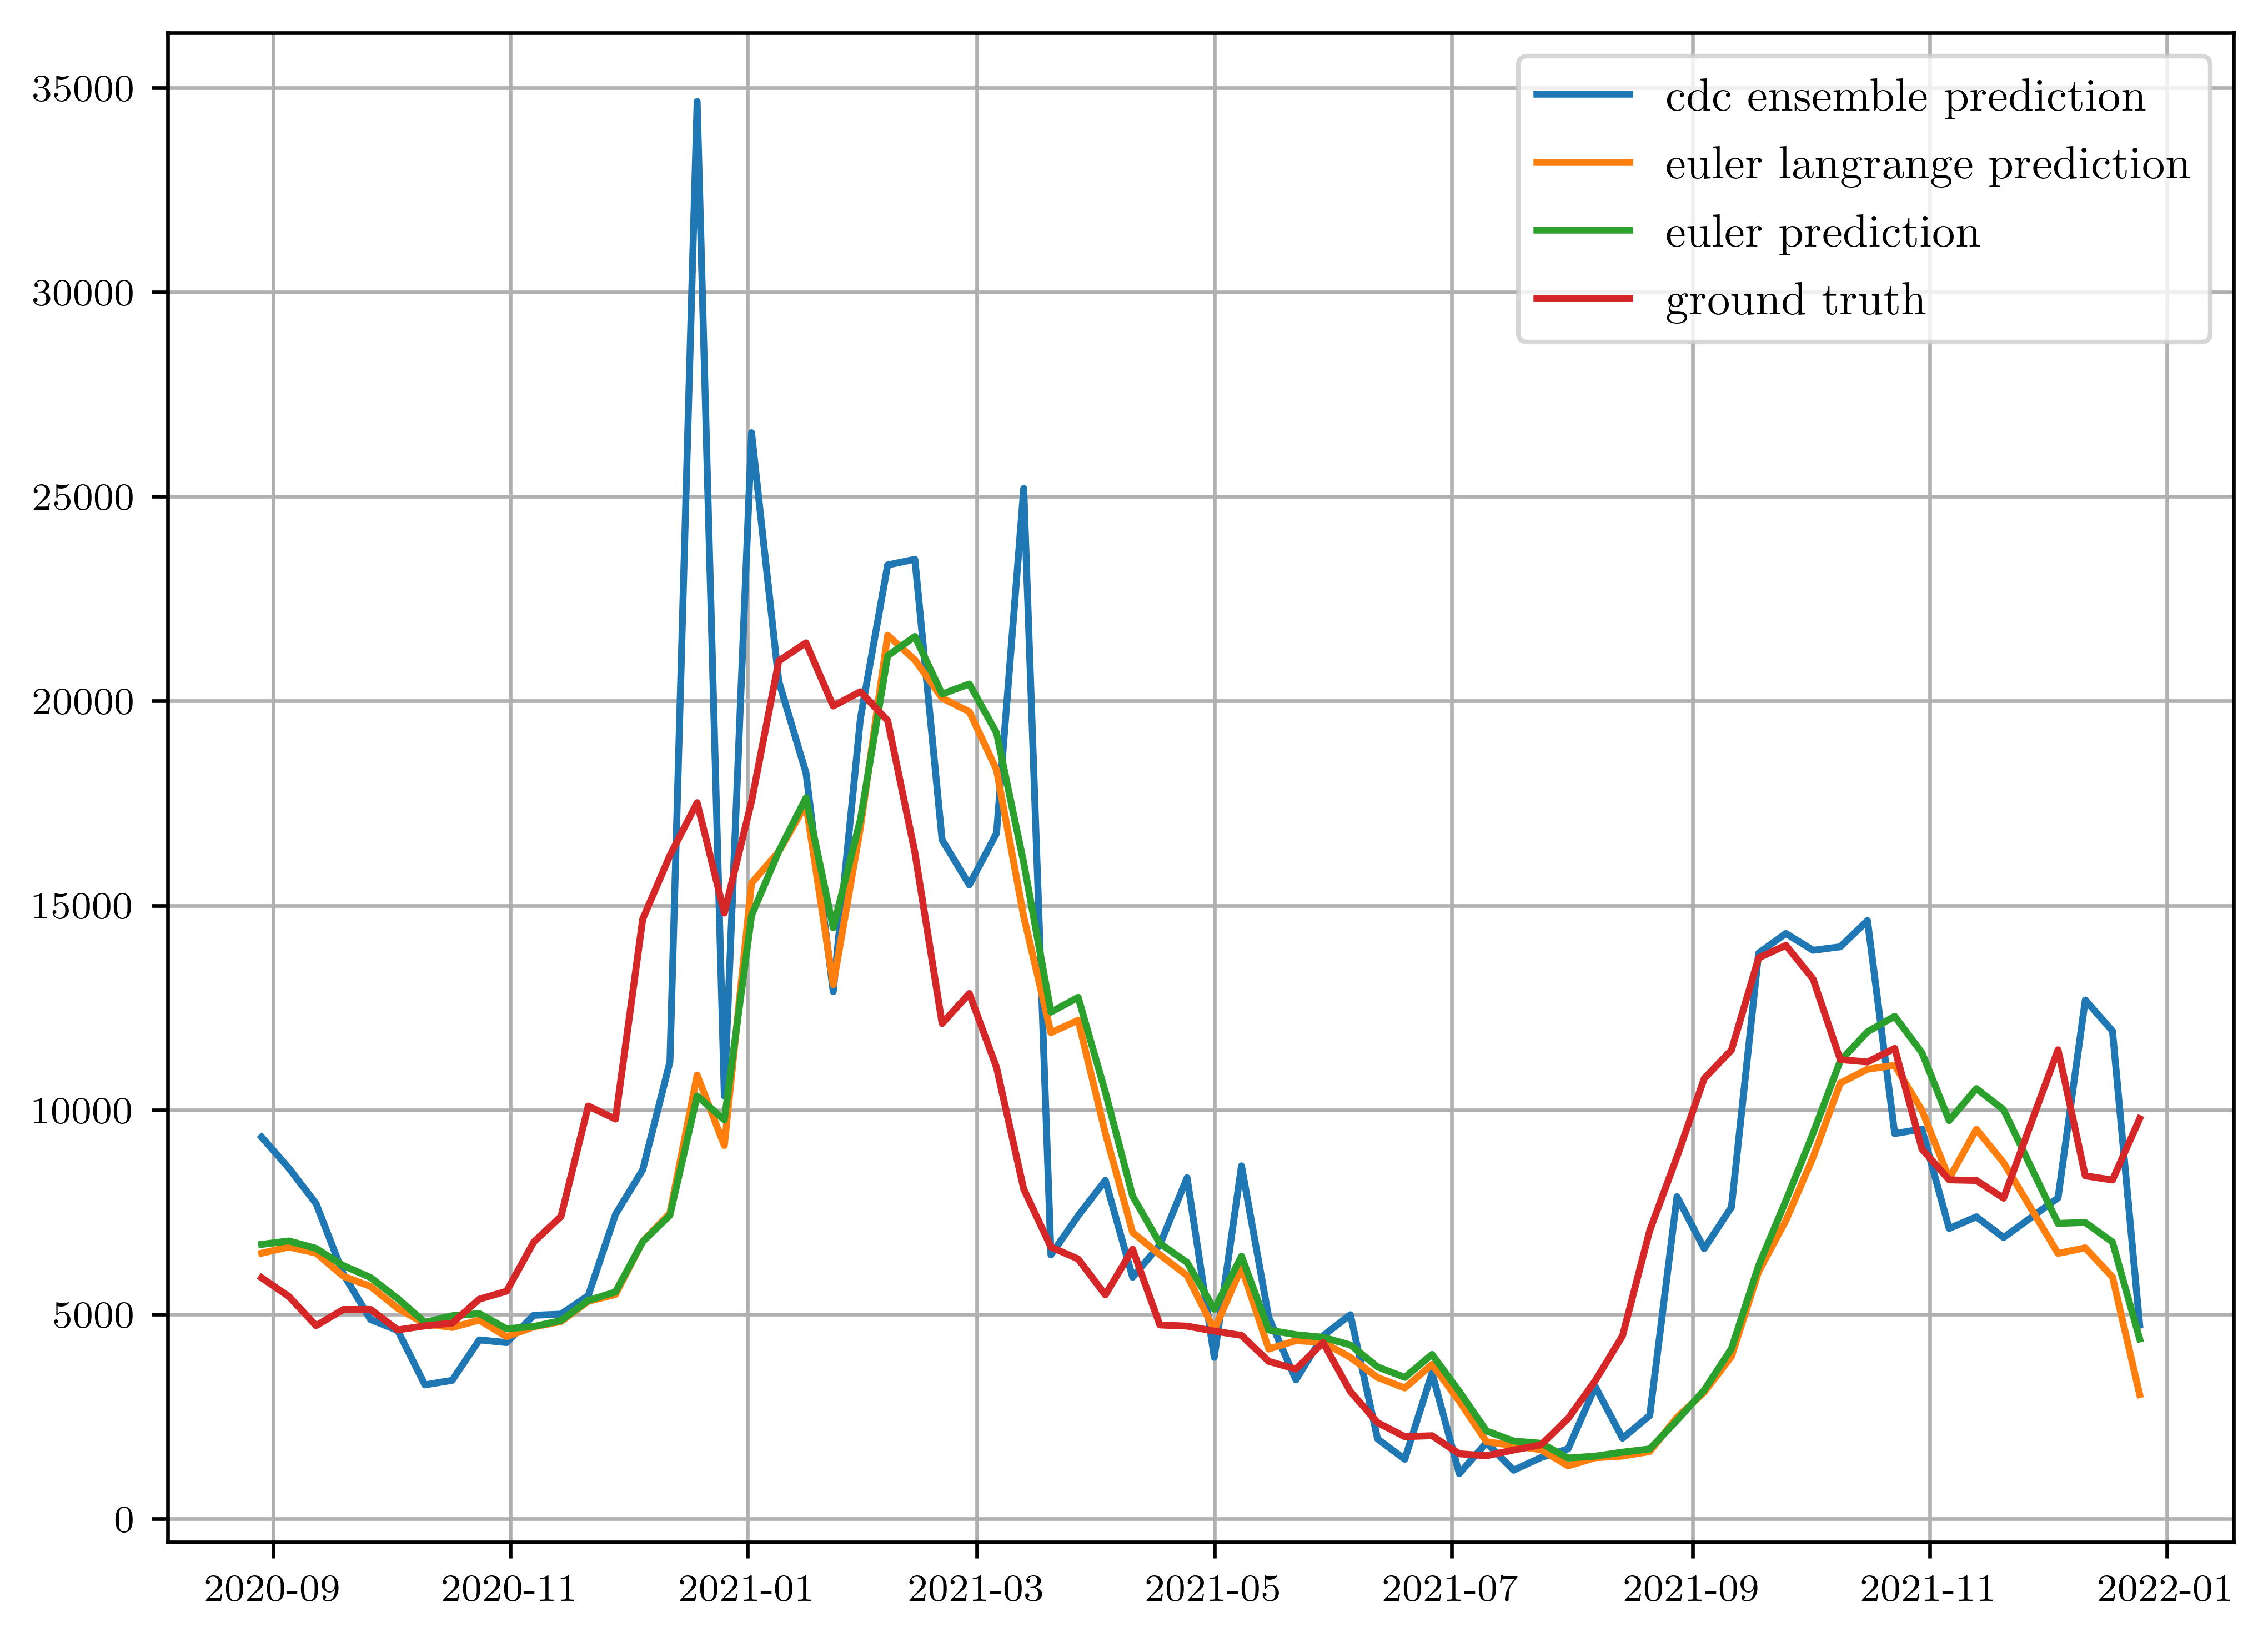

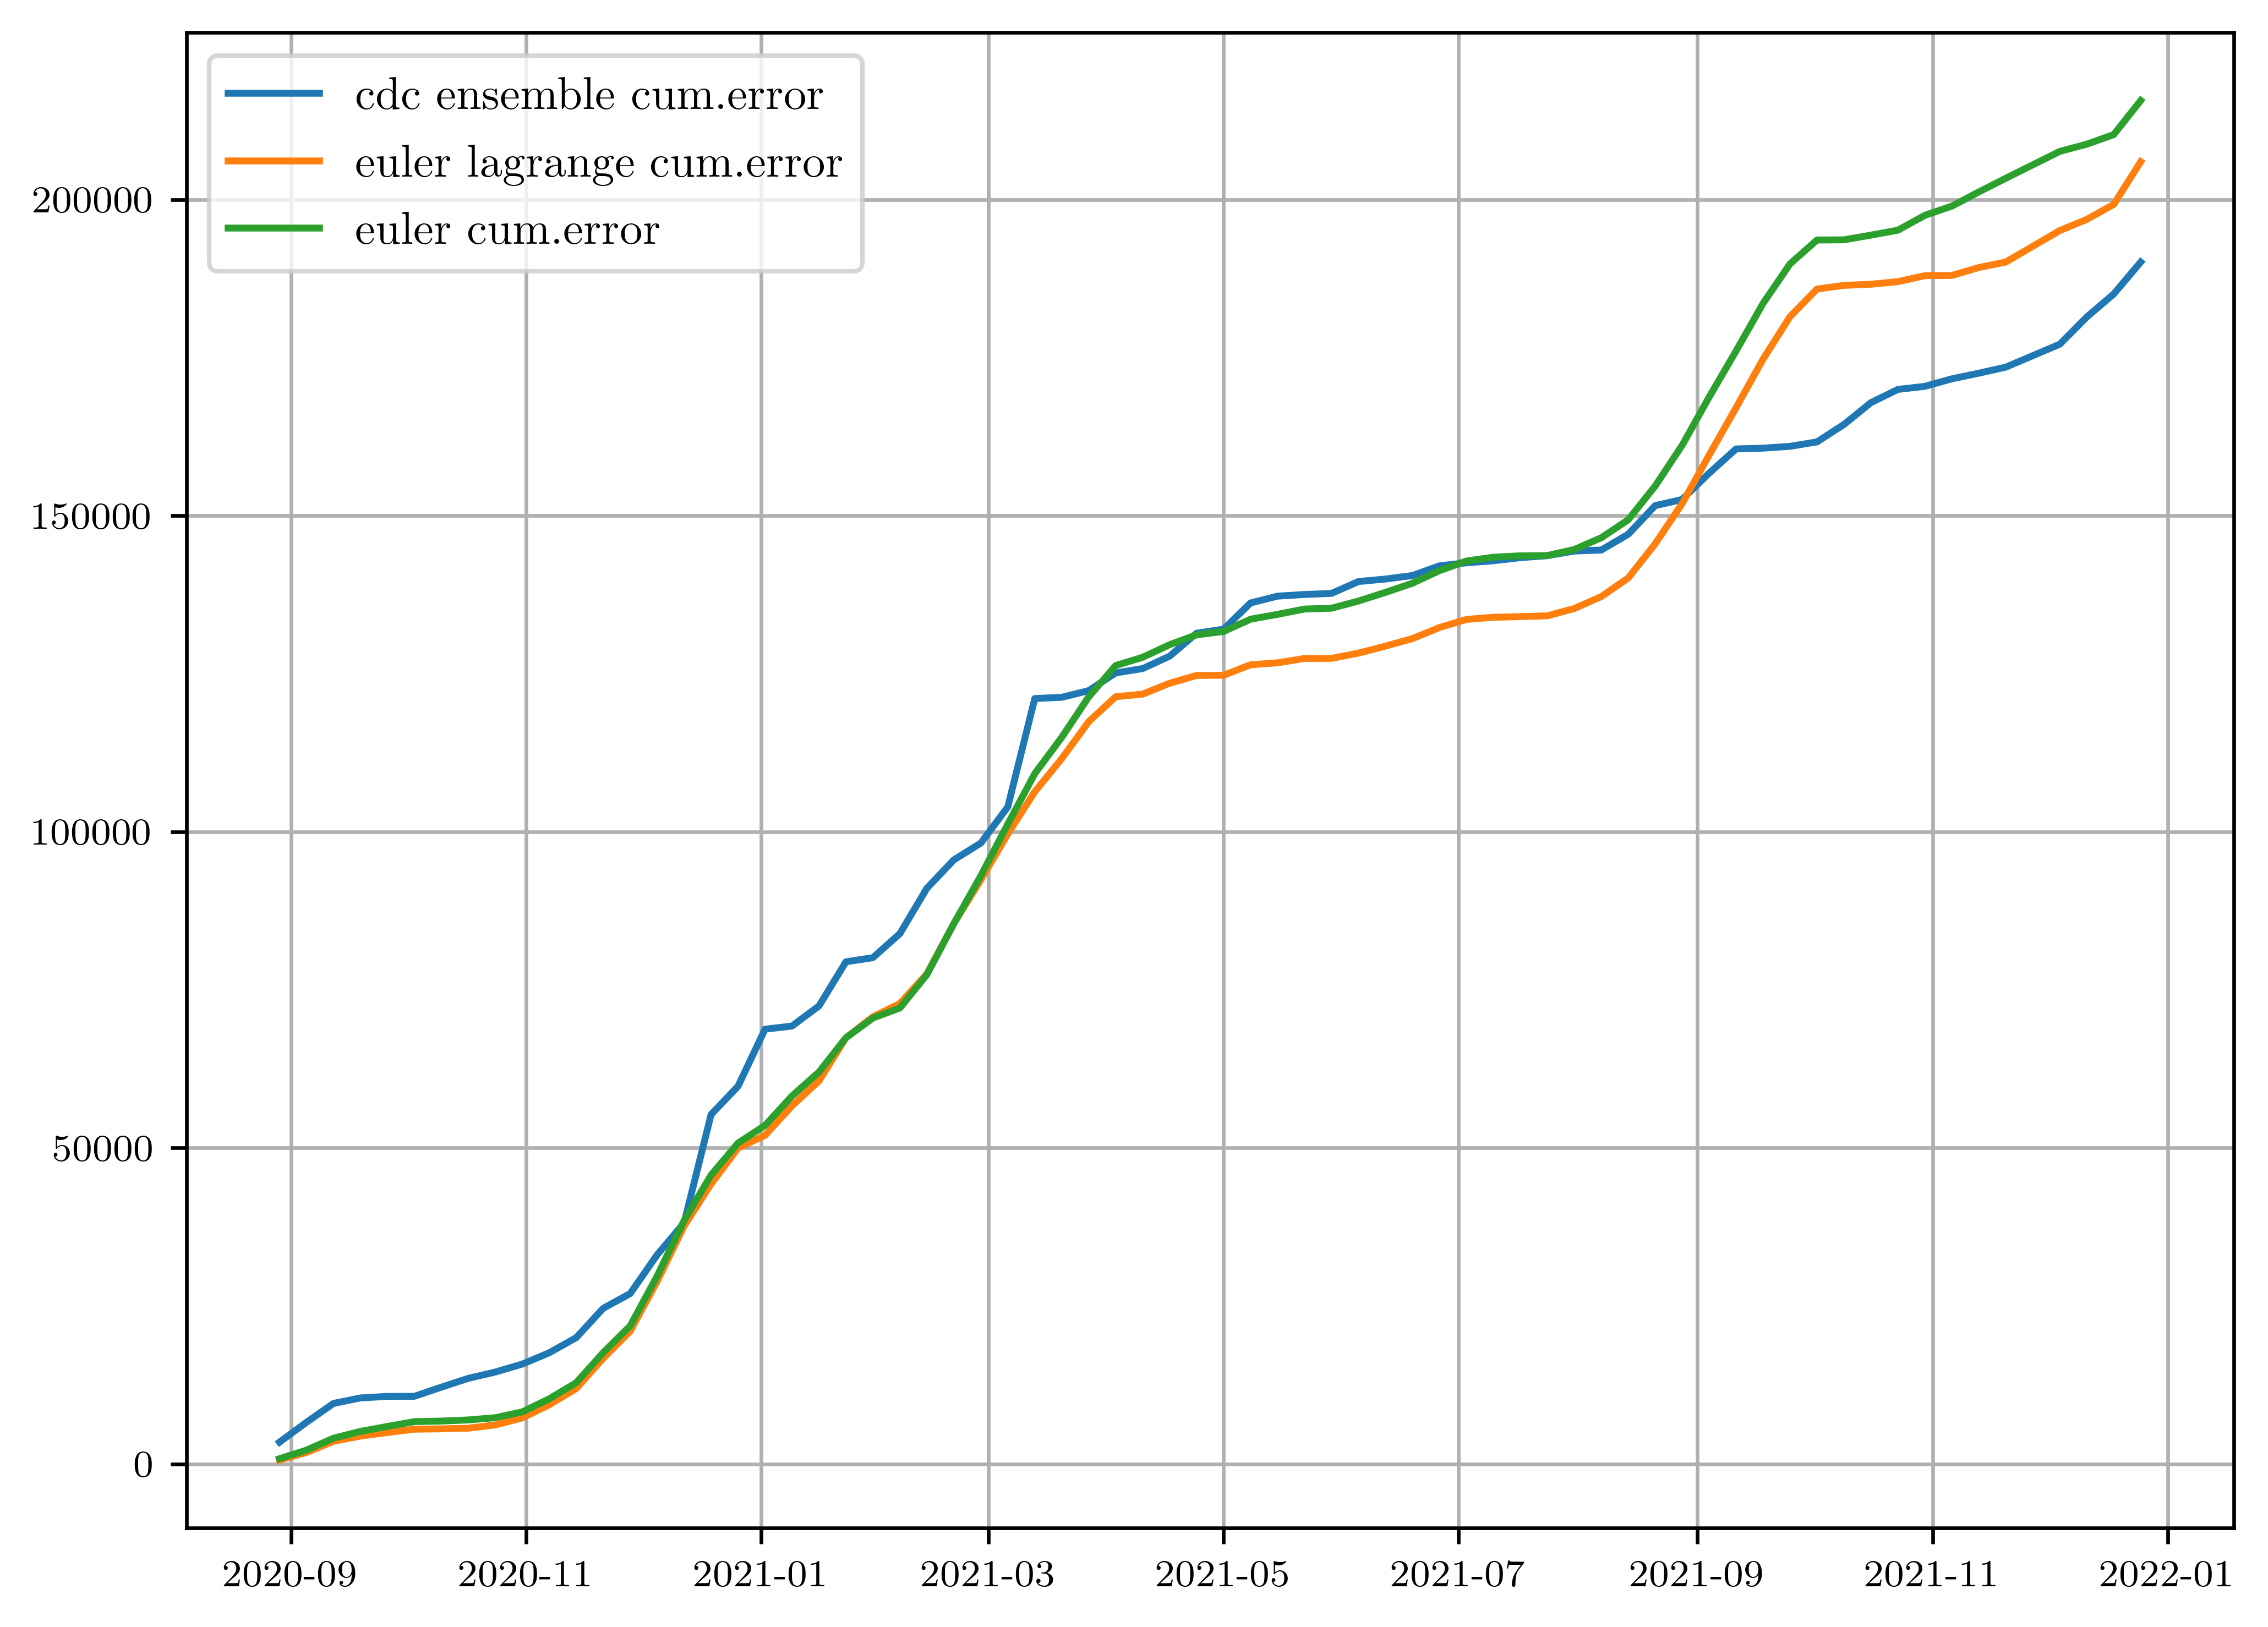

In [139]:
path_results_str = f"results/{fetched_month_year_str}/US"
print(path_results_str)

for week_forecast in [1,2,3,4]:
    corr_derivative = True

    if (week_forecast == 1):
        df = error_comparison_all_raw(covid_data, data_point_1wk, dates_1wk, week_forecast, corr__ = corr_derivative)
    elif (week_forecast == 2):
        df = error_comparison_all_raw(covid_data, data_point_2wk, dates_2wk, week_forecast, corr__ = corr_derivative)
    elif (week_forecast == 3):
        df = error_comparison_all_raw(covid_data, data_point_3wk, dates_3wk, week_forecast, corr__ = corr_derivative)
    elif (week_forecast == 4):
        df = error_comparison_all_raw(covid_data, data_point_4wk, dates_4wk, week_forecast, corr__ = corr_derivative)

    corr_derivative = False
    if (week_forecast == 1):
        df_euler = error_comparison_all_raw(covid_data, data_point_1wk, dates_1wk, week_forecast, corr__ = corr_derivative)
    elif (week_forecast == 2):
        df_euler = error_comparison_all_raw(covid_data, data_point_2wk, dates_2wk, week_forecast, corr__ = corr_derivative)
    elif (week_forecast == 3):
        df_euler = error_comparison_all_raw(covid_data, data_point_3wk, dates_3wk, week_forecast, corr__ = corr_derivative)
    elif (week_forecast == 4):
        df_euler = error_comparison_all_raw(covid_data, data_point_4wk, dates_4wk, week_forecast, corr__ = corr_derivative)


    from pathlib import Path
    output_dir = Path(f'../../{path_results_str}')
    output_dir.mkdir(parents=True, exist_ok=True)
    print(f"results going to {output_dir}")
    df.to_csv(f'{output_dir}/{fetched_month_year_str}_error_euler_langrange_cdc_week_{week_forecast}.csv')
    print(f" csv path")
    print(f'{output_dir}/{fetched_month_year_str}_error_euler_langrange_cdc_week_{week_forecast}.csv')

    from matplotlib.pyplot import figure

    figure(figsize=(8, 6), dpi=600)
    plt.plot(df["target_prediction_date"], df["error_cdc_ensemble"])
    plt.plot(df["target_prediction_date"], df["error_euler"])
    plt.plot(df_euler["target_prediction_date"], df_euler["error_euler"])
    plt.grid()
    plt.legend(['cdc ensemble error','euler langrange error', 'euler error'])
    plt.savefig(f'{output_dir}/{fetched_month_year_str}_prediction_error_euler_langrange_week_{week_forecast}.pdf', dpi = 600)
    print("fig goes to ")
    print(f'{output_dir}/{fetched_month_year_str}_prediction_error_euler_langrange_week_{week_forecast}.pdf')


    figure(figsize=(8, 6), dpi=600)
    plt.plot(df["target_prediction_date"], df["cdc_prediction_value"])
    plt.plot(df["target_prediction_date"], df["euler_prediction_value"])
    plt.plot(df_euler["target_prediction_date"], df_euler["euler_prediction_value"])
    plt.plot(df["target_prediction_date"], df["ground_truth_incidence"])
    plt.grid()
    plt.legend(['cdc ensemble prediction','euler langrange prediction', 'euler prediction', 'ground truth'])
    plt.savefig(f'{output_dir}/{fetched_month_year_str}_predictions_euler_langrange_week_{week_forecast}.pdf', dpi = 600)


    figure(figsize=(8, 6), dpi=600)
    plt.plot(df["target_prediction_date"], df["cum_error_cdc_ensemble"])
    plt.plot(df["target_prediction_date"], df["cum_error_euler"])
    plt.plot(df_euler["target_prediction_date"], df_euler["cum_error_euler"])
    plt.grid()
    plt.legend(['cdc ensemble cum.error','euler lagrange cum.error', 'euler cum.error'])
    plt.savefig(f'{output_dir}/{fetched_month_year_str}_cumulative_prediction_error_euler_langrange_week_{week_forecast}.pdf', dpi = 600)


    print(f"week forecst {week_forecast}")
    print("cum cdc error: ", df["cum_error_cdc_ensemble"].iloc[-1])
    print("cum euler lagrange error: ",  df["cum_error_euler"].iloc[-1])
    print("cum euler error: ",  df_euler["cum_error_euler"].iloc[-1])